In [1]:
import seaborn as sns
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import zipfile
from pathlib import Path
from IPython.display import display, Latex, Markdown
import warnings; warnings.simplefilter('ignore')

D:\software\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<h2>PART I. Category the hour into different time period

In [2]:
data_oct = pd.read_csv('mean_speed_rd_Oct.csv')

<h3> Weekday data

In [3]:
# 1.1 Select Weekday data
data_oct_wkday = data_oct[(data_oct['weekday'] == 'Monday') |(data_oct['weekday'] == 'Tuesday') |
                          (data_oct['weekday'] == 'Wednesday') |(data_oct['weekday'] == 'Thursday') | 
                          (data_oct['weekday'] == 'Friday') ]
data_oct_wkday

osm_way_id    weekday  hour  speed_mph_mean
0           4304424     Friday     8       34.344333
1           4304424     Friday     9       34.157000
2           4304424     Friday    10       33.377667
3           4304424     Friday    11       32.288000
4           4304424     Friday    12       35.568000
...             ...        ...   ...             ...
4636613   700434986  Wednesday    19       64.170200
4636614   700434986  Wednesday    20       65.557200
4636615   700434986  Wednesday    21       67.174400
4636616   700434986  Wednesday    22       67.932200
4636617   700434986  Wednesday    23       68.078600

[3426790 rows x 4 columns]

In [4]:
# 1.2 Category the hour to AM(7-10AM),MID-DAY(10AM-4PM),PM(4PM-8PM),NIGHT(8PM-12PM)
data_oct_wkday.loc[(data_oct_wkday['hour']>=7)&(data_oct_wkday['hour']<10), 'Time period'] = 'AM'
data_oct_wkday.loc[(data_oct_wkday['hour']>=10)&(data_oct_wkday['hour']<16), 'Time period'] = 'MID-DAY'
data_oct_wkday.loc[(data_oct_wkday['hour']>=16)&(data_oct_wkday['hour']<20), 'Time period'] = 'PM'
data_oct_wkday.loc[(data_oct_wkday['hour']>=20)&(data_oct_wkday['hour']<=24), 'Time period'] = 'NIGHT'
data_oct_wkday

osm_way_id    weekday  hour  speed_mph_mean Time period
0           4304424     Friday     8       34.344333          AM
1           4304424     Friday     9       34.157000          AM
2           4304424     Friday    10       33.377667     MID-DAY
3           4304424     Friday    11       32.288000     MID-DAY
4           4304424     Friday    12       35.568000     MID-DAY
...             ...        ...   ...             ...         ...
4636613   700434986  Wednesday    19       64.170200          PM
4636614   700434986  Wednesday    20       65.557200       NIGHT
4636615   700434986  Wednesday    21       67.174400       NIGHT
4636616   700434986  Wednesday    22       67.932200       NIGHT
4636617   700434986  Wednesday    23       68.078600       NIGHT

[3426790 rows x 5 columns]

In [5]:
# 1.3 Group the time period
data_oct_wkday_time = data_oct_wkday.set_index('osm_way_id').groupby(['osm_way_id','Time period']).mean()[['speed_mph_mean']]
data_oct_wkday_time

speed_mph_mean
osm_way_id Time period                
4304424    AM                34.152854
           MID-DAY           33.478769
           NIGHT             34.181987
           PM                22.131696
4311275    AM                53.564337
...                                ...
700434983  PM                27.024833
700434986  AM                66.105517
           MID-DAY           61.121733
           NIGHT             66.688397
           PM                42.118941

[255415 rows x 1 columns]

In [6]:
# 2.1 Make the pivot table of osm_way_id and time period.
data_oct_wkday_time_pivot = data_oct_wkday_time.reset_index().pivot(index='osm_way_id', 
                                                                    columns='Time period', values='speed_mph_mean')

In [7]:
data_oct_wkday_time_pivot.describe()

Time period            AM       MID-DAY         NIGHT            PM
count        63966.000000  64784.000000  59820.000000  66845.000000
mean            27.745525     28.473587     30.036356     26.900446
std             12.268174     12.975058     13.299631     12.206552
min              1.084000      1.380000      1.058000      1.180000
25%             19.327465     19.516926     20.927796     18.424723
50%             26.038066     26.333677     28.033723     24.973982
75%             33.244381     33.887573     35.238664     32.292333
max             75.611000     76.894000     73.932000     74.445000

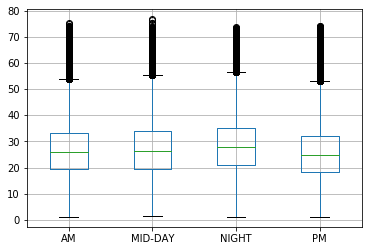

In [8]:
data_oct_wkday_time_pivot.boxplot()

In [9]:
# 2.2 Assign NaN value to the row average
weekday_rdspeed_fillna = data_oct_wkday_time_pivot.apply(lambda row: row.fillna(row.mean()), axis=1)
weekday_rdspeed_fillna

Time period         AM    MID-DAY      NIGHT         PM
osm_way_id                                             
4304424      34.152854  33.478769  34.181987  22.131696
4311275      53.564337  63.513644  66.202885  42.738195
4311277      33.851808  36.293369  38.307108  34.549462
4311278      41.898165  51.035608  49.618054  49.686330
4311288      34.950215  35.141349  36.433744  35.142926
...                ...        ...        ...        ...
700422838    34.110009  31.858555  28.823208  25.075572
700434979    29.721024  27.912307  24.097000  30.118835
700434982    13.958958  15.775192  19.619865  16.796271
700434983    17.798487  20.532500  31.859500  27.024833
700434986    66.105517  61.121733  66.688397  42.118941

[73787 rows x 4 columns]

In [10]:
weekday_rdspeed = weekday_rdspeed_fillna.reset_index()
weekday_rdspeed

Time period  osm_way_id         AM    MID-DAY      NIGHT         PM
0               4304424  34.152854  33.478769  34.181987  22.131696
1               4311275  53.564337  63.513644  66.202885  42.738195
2               4311277  33.851808  36.293369  38.307108  34.549462
3               4311278  41.898165  51.035608  49.618054  49.686330
4               4311288  34.950215  35.141349  36.433744  35.142926
...                 ...        ...        ...        ...        ...
73782         700422838  34.110009  31.858555  28.823208  25.075572
73783         700434979  29.721024  27.912307  24.097000  30.118835
73784         700434982  13.958958  15.775192  19.619865  16.796271
73785         700434983  17.798487  20.532500  31.859500  27.024833
73786         700434986  66.105517  61.121733  66.688397  42.118941

[73787 rows x 5 columns]

<h3> Weekend data

In [11]:
# 3.1 Select Weekend data
data_oct_wkend = data_oct[(data_oct['weekday'] == 'Saturday') |(data_oct['weekday'] == 'Sunday')]
data_oct_wkend

osm_way_id   weekday  hour  speed_mph_mean
28          4304424  Saturday     8        35.09600
29          4304424  Saturday    10        35.12000
30          4304424  Saturday    11        36.02850
31          4304424  Saturday    12        34.70025
32          4304424  Saturday    14        33.72400
...             ...       ...   ...             ...
4636562   700434986    Sunday    19        66.77350
4636563   700434986    Sunday    20        66.30400
4636564   700434986    Sunday    21        66.54400
4636565   700434986    Sunday    22        66.33600
4636566   700434986    Sunday    23        66.06675

[1209828 rows x 4 columns]

In [12]:
# 3.2 Category the hour to AM(7-10AM),MID-DAY(10AM-4PM),PM(4PM-8PM),NIGHT(8PM-12PM)
data_oct_wkend.loc[(data_oct_wkend['hour']>=7)&(data_oct_wkend['hour']<10), 'Time period'] = 'AM'
data_oct_wkend.loc[(data_oct_wkend['hour']>=10)&(data_oct_wkend['hour']<16), 'Time period'] = 'MID-DAY'
data_oct_wkend.loc[(data_oct_wkend['hour']>=16)&(data_oct_wkend['hour']<20), 'Time period'] = 'PM'
data_oct_wkend.loc[(data_oct_wkend['hour']>=20)&(data_oct_wkend['hour']<=24), 'Time period'] = 'NIGHT'
data_oct_wkend

osm_way_id   weekday  hour  speed_mph_mean Time period
28          4304424  Saturday     8        35.09600          AM
29          4304424  Saturday    10        35.12000     MID-DAY
30          4304424  Saturday    11        36.02850     MID-DAY
31          4304424  Saturday    12        34.70025     MID-DAY
32          4304424  Saturday    14        33.72400     MID-DAY
...             ...       ...   ...             ...         ...
4636562   700434986    Sunday    19        66.77350          PM
4636563   700434986    Sunday    20        66.30400       NIGHT
4636564   700434986    Sunday    21        66.54400       NIGHT
4636565   700434986    Sunday    22        66.33600       NIGHT
4636566   700434986    Sunday    23        66.06675       NIGHT

[1209828 rows x 5 columns]

In [13]:
# 3.3 Group the time period
data_oct_wkend_time = data_oct_wkend.set_index('osm_way_id').groupby(['osm_way_id','Time period']).mean()[['speed_mph_mean']]
data_oct_wkend_time

speed_mph_mean
osm_way_id Time period                
4304424    AM                35.096000
           MID-DAY           35.079528
           NIGHT             34.429333
           PM                34.661200
4311275    AM                67.977022
...                                ...
700434983  PM                26.408625
700434986  AM                67.637042
           MID-DAY           66.505333
           NIGHT             66.161281
           PM                66.157125

[215022 rows x 1 columns]

In [14]:
# 4.1 Make the pivot table of osm_way_id and time period.
data_oct_wkend_time_pivot = data_oct_wkend_time.reset_index().pivot(index='osm_way_id', 
                                                                    columns='Time period', values='speed_mph_mean')
data_oct_wkend_time_pivot

Time period         AM    MID-DAY      NIGHT         PM
osm_way_id                                             
4304424      35.096000  35.079528  34.429333  34.661200
4311275      67.977022  62.369336  66.540510  64.557472
4311277      36.418000  39.092500  39.652687  37.116881
4311278      51.057388  50.813426  49.757149  49.975965
4311288      36.629000  38.770000  36.643400  36.661500
...                ...        ...        ...        ...
700422838          NaN  33.409000        NaN        NaN
700434979          NaN  23.571000        NaN        NaN
700434982    19.041000  17.612833  19.316476  13.738125
700434983    29.386500  24.341000  31.285350  26.408625
700434986    67.637042  66.505333  66.161281  66.157125

[65999 rows x 4 columns]

In [15]:
# 4.2 Assign NaN value to the row average
weekend_rdspeed_fillna = data_oct_wkend_time_pivot.apply(lambda row: row.fillna(row.mean()), axis=1)
weekend_rdspeed_fillna

Time period         AM    MID-DAY      NIGHT         PM
osm_way_id                                             
4304424      35.096000  35.079528  34.429333  34.661200
4311275      67.977022  62.369336  66.540510  64.557472
4311277      36.418000  39.092500  39.652687  37.116881
4311278      51.057388  50.813426  49.757149  49.975965
4311288      36.629000  38.770000  36.643400  36.661500
...                ...        ...        ...        ...
700422838    33.409000  33.409000  33.409000  33.409000
700434979    23.571000  23.571000  23.571000  23.571000
700434982    19.041000  17.612833  19.316476  13.738125
700434983    29.386500  24.341000  31.285350  26.408625
700434986    67.637042  66.505333  66.161281  66.157125

[65999 rows x 4 columns]

In [16]:
weekend_rdspeed = weekend_rdspeed_fillna.reset_index()
weekend_rdspeed

Time period  osm_way_id         AM    MID-DAY      NIGHT         PM
0               4304424  35.096000  35.079528  34.429333  34.661200
1               4311275  67.977022  62.369336  66.540510  64.557472
2               4311277  36.418000  39.092500  39.652687  37.116881
3               4311278  51.057388  50.813426  49.757149  49.975965
4               4311288  36.629000  38.770000  36.643400  36.661500
...                 ...        ...        ...        ...        ...
65994         700422838  33.409000  33.409000  33.409000  33.409000
65995         700434979  23.571000  23.571000  23.571000  23.571000
65996         700434982  19.041000  17.612833  19.316476  13.738125
65997         700434983  29.386500  24.341000  31.285350  26.408625
65998         700434986  67.637042  66.505333  66.161281  66.157125

[65999 rows x 5 columns]

<h2>PART II. Combine with OSM data

In [17]:
# 1. Import libraries
import geopandas as gpd
from shapely.geometry import Point, LineString, Polygon
import networkx as nx
import osmnx as ox
import matplotlib.pyplot as plt
from descartes import PolygonPatch
from IPython.display import IFrame
ox.config(log_console=True, use_cache=True)
import matplotlib.cm as cm
import matplotlib.colors as colors
from IPython.display import Image
from pprint import pprint

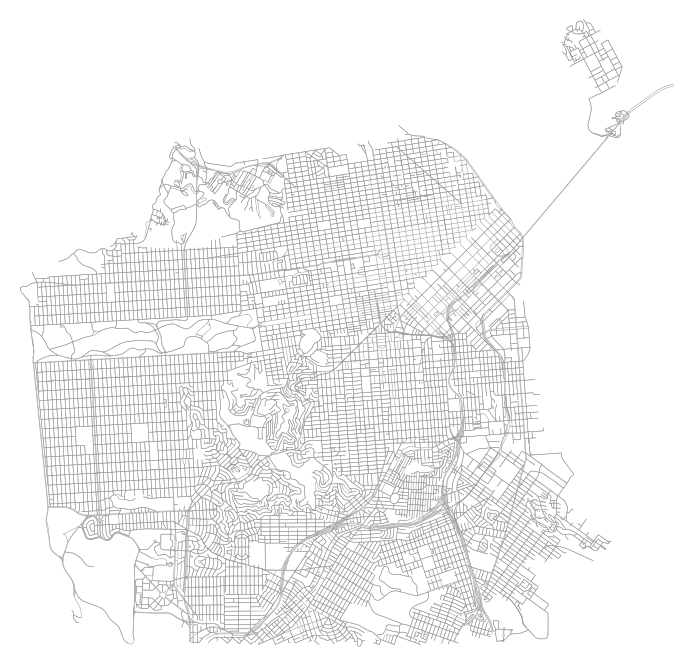

In [18]:
#2. Load San Francisco data 
place = {'city' : 'San Francisco',
         'state' : 'California',
         'country' : 'USA'}
G = ox.graph_from_place(place, network_type='drive')
fig, ax = ox.plot_graph(G, fig_height=12, node_size=0, edge_linewidth=0.5)

In [19]:
#3.retrieving the road information
G = ox.graph_from_place(place, network_type='drive',simplify=False)
G_simpl = ox.simplify_graph(G, strict=False)
G_proj = ox.project_graph(G_simpl,to_crs={'proj':'longlat','epsg':'32750' ,'ellps':'WGS84', 'datum':'WGS84'})

segments = ox.graph_to_gdfs(G_proj, nodes=False, edges=True)
segments.columns

Index(['u', 'v', 'key', 'osmid', 'oneway', 'highway', 'name', 'maxspeed',
       'length', 'geometry', 'lanes', 'access', 'ref', 'bridge', 'tunnel',
       'service', 'junction', 'width'],
      dtype='object')

In [20]:
#3.1 See the road that with maxspeed report
segments_maxspeed = segments[['osmid','highway','maxspeed']]
segments_maxspeed = segments_maxspeed.dropna()
segments_maxspeed 

osmid       highway maxspeed
0      133743842     secondary   25 mph
2      737961441      tertiary   25 mph
10     255178055      tertiary   25 mph
11     255178055      tertiary   25 mph
12     437558596       primary   25 mph
...          ...           ...      ...
31304    8917611      tertiary   30 mph
31305  620169740  unclassified   20 mph
31321  516185201     secondary   40 mph
31326  514412271     secondary   35 mph
31327  514729108     secondary   35 mph

[6633 rows x 3 columns]

In [21]:
segments_maxspeed['maxspeed2'] = segments_maxspeed['maxspeed'].str.extract('(\d+)').astype(int)
segments_maxspeed

osmid       highway maxspeed  maxspeed2
0      133743842     secondary   25 mph         25
2      737961441      tertiary   25 mph         25
10     255178055      tertiary   25 mph         25
11     255178055      tertiary   25 mph         25
12     437558596       primary   25 mph         25
...          ...           ...      ...        ...
31304    8917611      tertiary   30 mph         30
31305  620169740  unclassified   20 mph         20
31321  516185201     secondary   40 mph         40
31326  514412271     secondary   35 mph         35
31327  514729108     secondary   35 mph         35

[6633 rows x 4 columns]

In [22]:
#3.2 See different category max speed.
segments_maxspeed.groupby('highway').mean()[['maxspeed2']]

maxspeed2
highway                  
motorway        50.605381
motorway_link   46.190476
primary         31.136609
primary_link    31.000000
residential     25.866873
secondary       28.774126
secondary_link  33.409091
tertiary        26.195652
tertiary_link   25.000000
trunk           43.022388
trunk_link      45.952381
unclassified    18.387097

In [23]:
#4.1 Join the road speed data to segments by osm_way_id(weekday)
rd_weekday = weekday_rdspeed.rename(columns = {'osm_way_id':'osmid'})
segments_join_wkday = segments.merge(rd_weekday, on ='osmid')
segments_join_wkday

u           v  key      osmid  oneway      highway  \
0       287834139    65312832    0  133743842    True    secondary   
1       287834139  6902779320    0  503825191    True    secondary   
2        65337375    65359314    0   25372358   False     tertiary   
3        65359314    65337375    0   25372358   False     tertiary   
4        65337375  3836814558    0  425516652   False     tertiary   
...           ...         ...  ...        ...     ...          ...   
23028  6382089301  1985091614    0  187871688    True  residential   
23029  5590744546    65287360    0  584944917    True    secondary   
23030  3526885173  3885158728    0  385163271    True  residential   
23031  3526885173    65346168    0  516185201    True    secondary   
23032  4784127976    65339315    0  254448242    True    secondary   

                         name maxspeed   length  \
0             Dewey Boulevard   25 mph   11.204   
1      Laguna Honda Boulevard      NaN   12.120   
2              Sansome Street      NaN  102.552   
3              Sansome Street      NaN  102.552   
4              Sansome Street      NaN   49.126   
...                       ...      ...      ...   
23028        El Dorado Street      NaN   42.895   
23029         Crossover Drive      NaN   63.335   
23030             State Drive      NaN   12.630   
23031   Lake Merced Boulevard   40 mph  202.179   
23032       Divisadero Street      NaN   95.458   

                                                geometry  ...  ref bridge  \
0      LINESTRING (-122.45927 37.74722, -122.45914 37...  ...  NaN    NaN   
1      LINESTRING (-122.45927 37.74722, -122.45918 37...  ...  NaN    NaN   
2      LINESTRING (-122.40187 37.79663, -122.40186 37...  ...  NaN    NaN   
3      LINESTRING (-122.40169 37.79572, -122.40171 37...  ...  NaN    NaN   
4      LINESTRING (-122.40187 37.79663, -122.40188 37...  ...  NaN    NaN   
...                                                  ...  ...  ...    ...   
23028  LINESTRING (-122.39365 37.77229, -122.39341 37...  ...  NaN    NaN   
23029  LINESTRING (-122.48389 37.77208, -122.48393 37...  ...  NaN    NaN   
23030  LINESTRING (-122.48462 37.72496, -122.48476 37...  ...  NaN    NaN   
23031  LINESTRING (-122.48462 37.72496, -122.48398 37...  ...  NaN    NaN   
23032  LINESTRING (-122.43873 37.77976, -122.43886 37...  ...  NaN    NaN   

      tunnel service junction width         AM    MID-DAY      NIGHT  \
0        NaN     NaN      NaN   NaN  19.795550  19.836289  19.225980   
1        NaN     NaN      NaN   NaN  18.653463  18.893222  18.840850   
2        NaN     NaN      NaN   NaN  10.050888  11.051675  18.766268   
3        NaN     NaN      NaN   NaN  10.050888  11.051675  18.766268   
4        NaN     NaN      NaN   NaN  15.261397  16.249969  21.472566   
...      ...     ...      ...   ...        ...        ...        ...   
23028    NaN     NaN      NaN   NaN  10.105000  13.036000  12.186500   
23029    NaN     NaN      NaN   NaN   8.474613   8.369302   8.309448   
23030    NaN     NaN      NaN   NaN  20.633167  20.331000  18.966500   
23031    NaN     NaN      NaN   NaN  29.715847  29.485952  33.124400   
23032    NaN     NaN      NaN   NaN  20.980553  10.181948  11.648935   

              PM  
0      20.254035  
1      19.376290  
2      13.087718  
3      13.087718  
4      18.054641  
...          ...  
23028  13.418500  
23029   8.853408  
23030  22.602000  
23031  25.701165  
23032   9.885697  

[23033 rows x 22 columns]

In [24]:
#4.2 Join the road speed data to segments by osm_way_id(weekend)
rd_weekend = weekend_rdspeed.rename(columns = {'osm_way_id':'osmid'})
segments_join_wkend = segments.merge(rd_weekend, on ='osmid')
segments_join_wkend

u           v  key      osmid  oneway      highway  \
0       287834139    65312832    0  133743842    True    secondary   
1       287834139  6902779320    0  503825191    True    secondary   
2        65337375    65359314    0   25372358   False     tertiary   
3        65359314    65337375    0   25372358   False     tertiary   
4        65337375  3836814558    0  425516652   False     tertiary   
...           ...         ...  ...        ...     ...          ...   
21453  4021550367  4021550360    0  396989358    True      primary   
21454  5590744546    65287360    0  584944917    True    secondary   
21455  3526885173  3885158728    0  385163271    True  residential   
21456  3526885173    65346168    0  516185201    True    secondary   
21457  4784127976    65339315    0  254448242    True    secondary   

                         name maxspeed   length  \
0             Dewey Boulevard   25 mph   11.204   
1      Laguna Honda Boulevard      NaN   12.120   
2              Sansome Street      NaN  102.552   
3              Sansome Street      NaN  102.552   
4              Sansome Street      NaN   49.126   
...                       ...      ...      ...   
21453     Cesar Chavez Street      NaN   88.273   
21454         Crossover Drive      NaN   63.335   
21455             State Drive      NaN   12.630   
21456   Lake Merced Boulevard   40 mph  202.179   
21457       Divisadero Street      NaN   95.458   

                                                geometry  ...  ref bridge  \
0      LINESTRING (-122.45927 37.74722, -122.45914 37...  ...  NaN    NaN   
1      LINESTRING (-122.45927 37.74722, -122.45918 37...  ...  NaN    NaN   
2      LINESTRING (-122.40187 37.79663, -122.40186 37...  ...  NaN    NaN   
3      LINESTRING (-122.40169 37.79572, -122.40171 37...  ...  NaN    NaN   
4      LINESTRING (-122.40187 37.79663, -122.40188 37...  ...  NaN    NaN   
...                                                  ...  ...  ...    ...   
21453  LINESTRING (-122.42030 37.74817, -122.42044 37...  ...  NaN    NaN   
21454  LINESTRING (-122.48389 37.77208, -122.48393 37...  ...  NaN    NaN   
21455  LINESTRING (-122.48462 37.72496, -122.48476 37...  ...  NaN    NaN   
21456  LINESTRING (-122.48462 37.72496, -122.48398 37...  ...  NaN    NaN   
21457  LINESTRING (-122.43873 37.77976, -122.43886 37...  ...  NaN    NaN   

      tunnel service junction width         AM    MID-DAY      NIGHT  \
0        NaN     NaN      NaN   NaN  21.566917  20.335632  18.271094   
1        NaN     NaN      NaN   NaN  17.782611  18.556667  17.766031   
2        NaN     NaN      NaN   NaN  24.028667  20.079042  21.902671   
3        NaN     NaN      NaN   NaN  24.028667  20.079042  21.902671   
4        NaN     NaN      NaN   NaN  24.477625  20.258531  22.186148   
...      ...     ...      ...   ...        ...        ...        ...   
21453    NaN     NaN      NaN   NaN  27.738889  23.658500  26.677219   
21454    NaN     NaN      NaN   NaN   8.789667   8.257000   8.602906   
21455    NaN     NaN      NaN   NaN  15.875000  15.875000  15.875000   
21456    NaN     NaN      NaN   NaN  34.045000  27.564042  33.021813   
21457    NaN     NaN      NaN   NaN  12.315792   9.906521  11.923937   

              PM  
0      20.297479  
1      18.338531  
2      20.215906  
3      20.215906  
4      21.507375  
...          ...  
21453  24.149250  
21454   8.668531  
21455  15.875000  
21456  30.309594  
21457  10.344844  

[21458 rows x 22 columns]

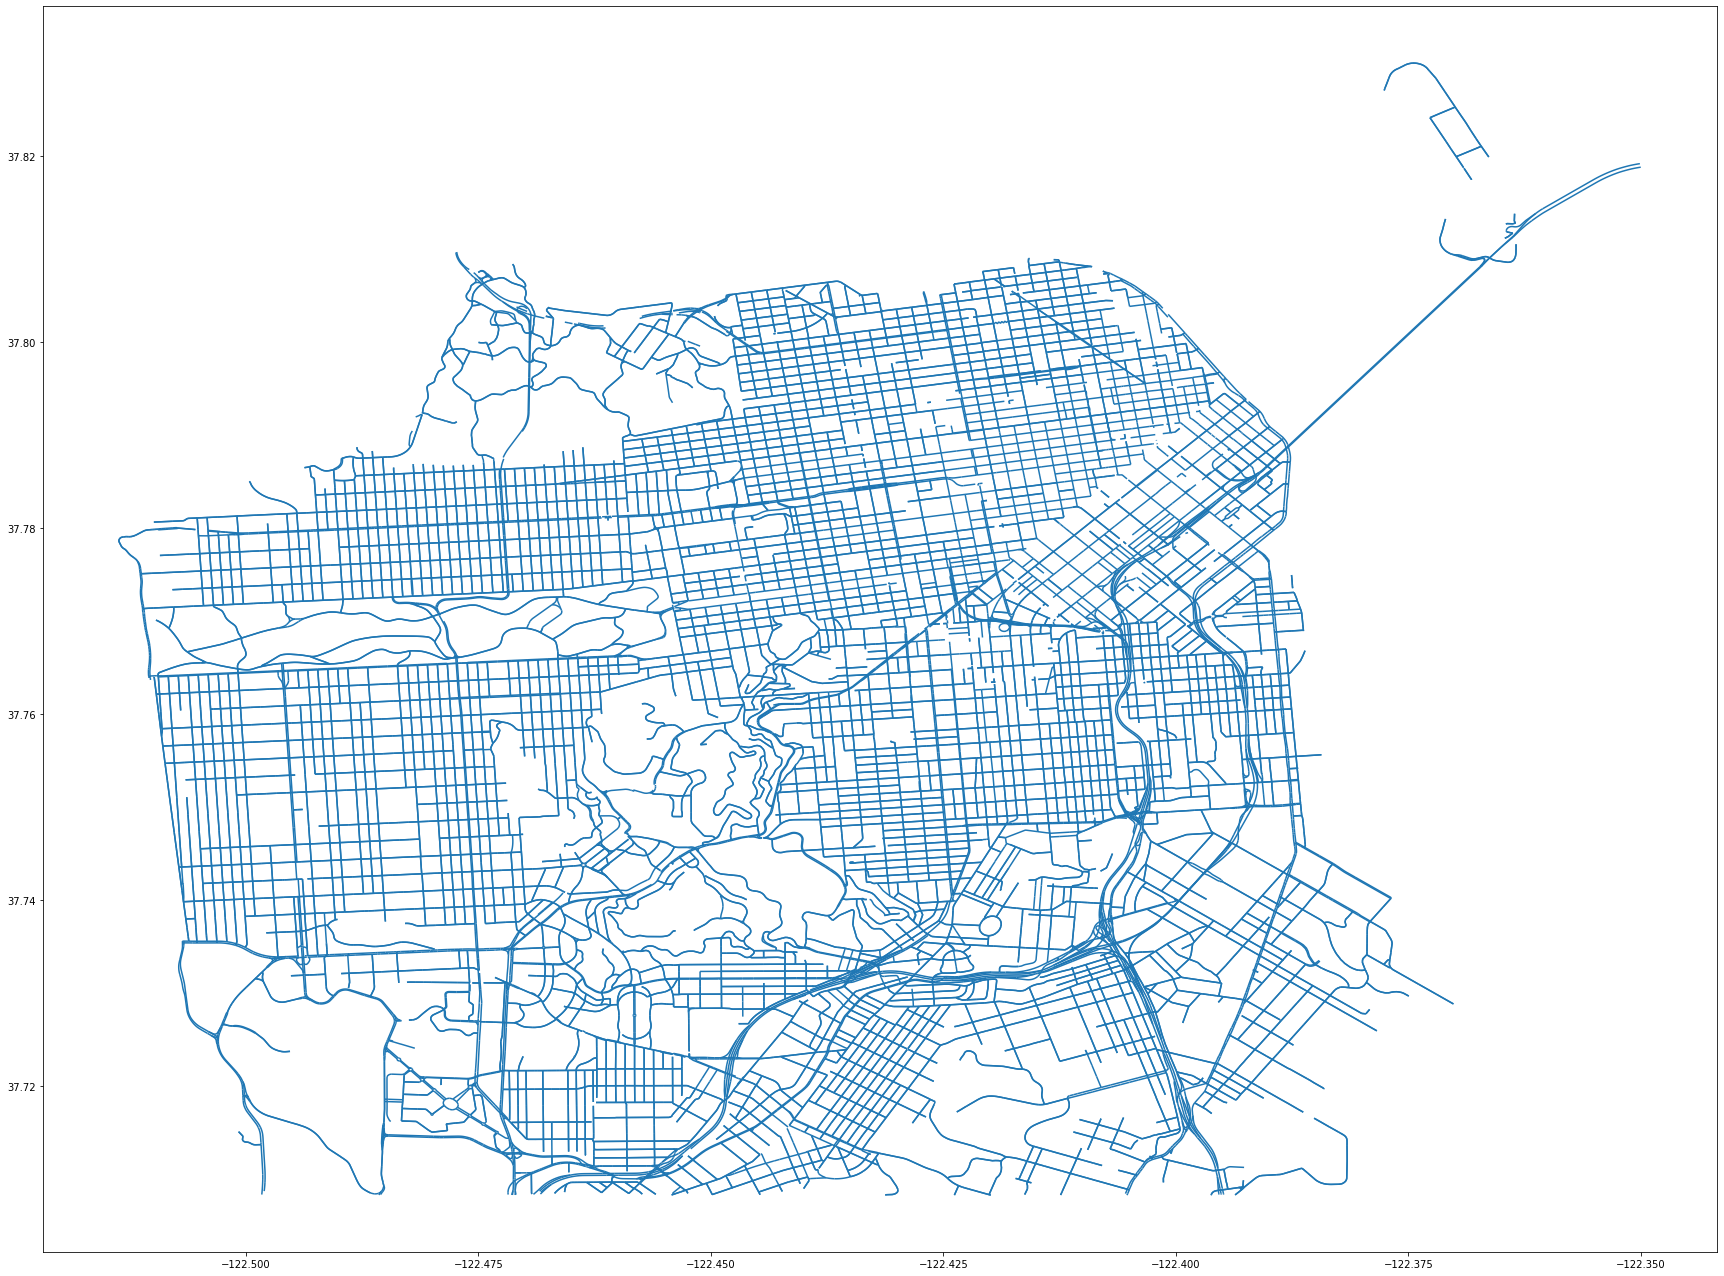

In [25]:
#Weekday valid road plot
fig, ax = plt.subplots(figsize=(30,30))
segments_join_wkday.plot(ax=ax, linewidth=1.5)
plt.show()

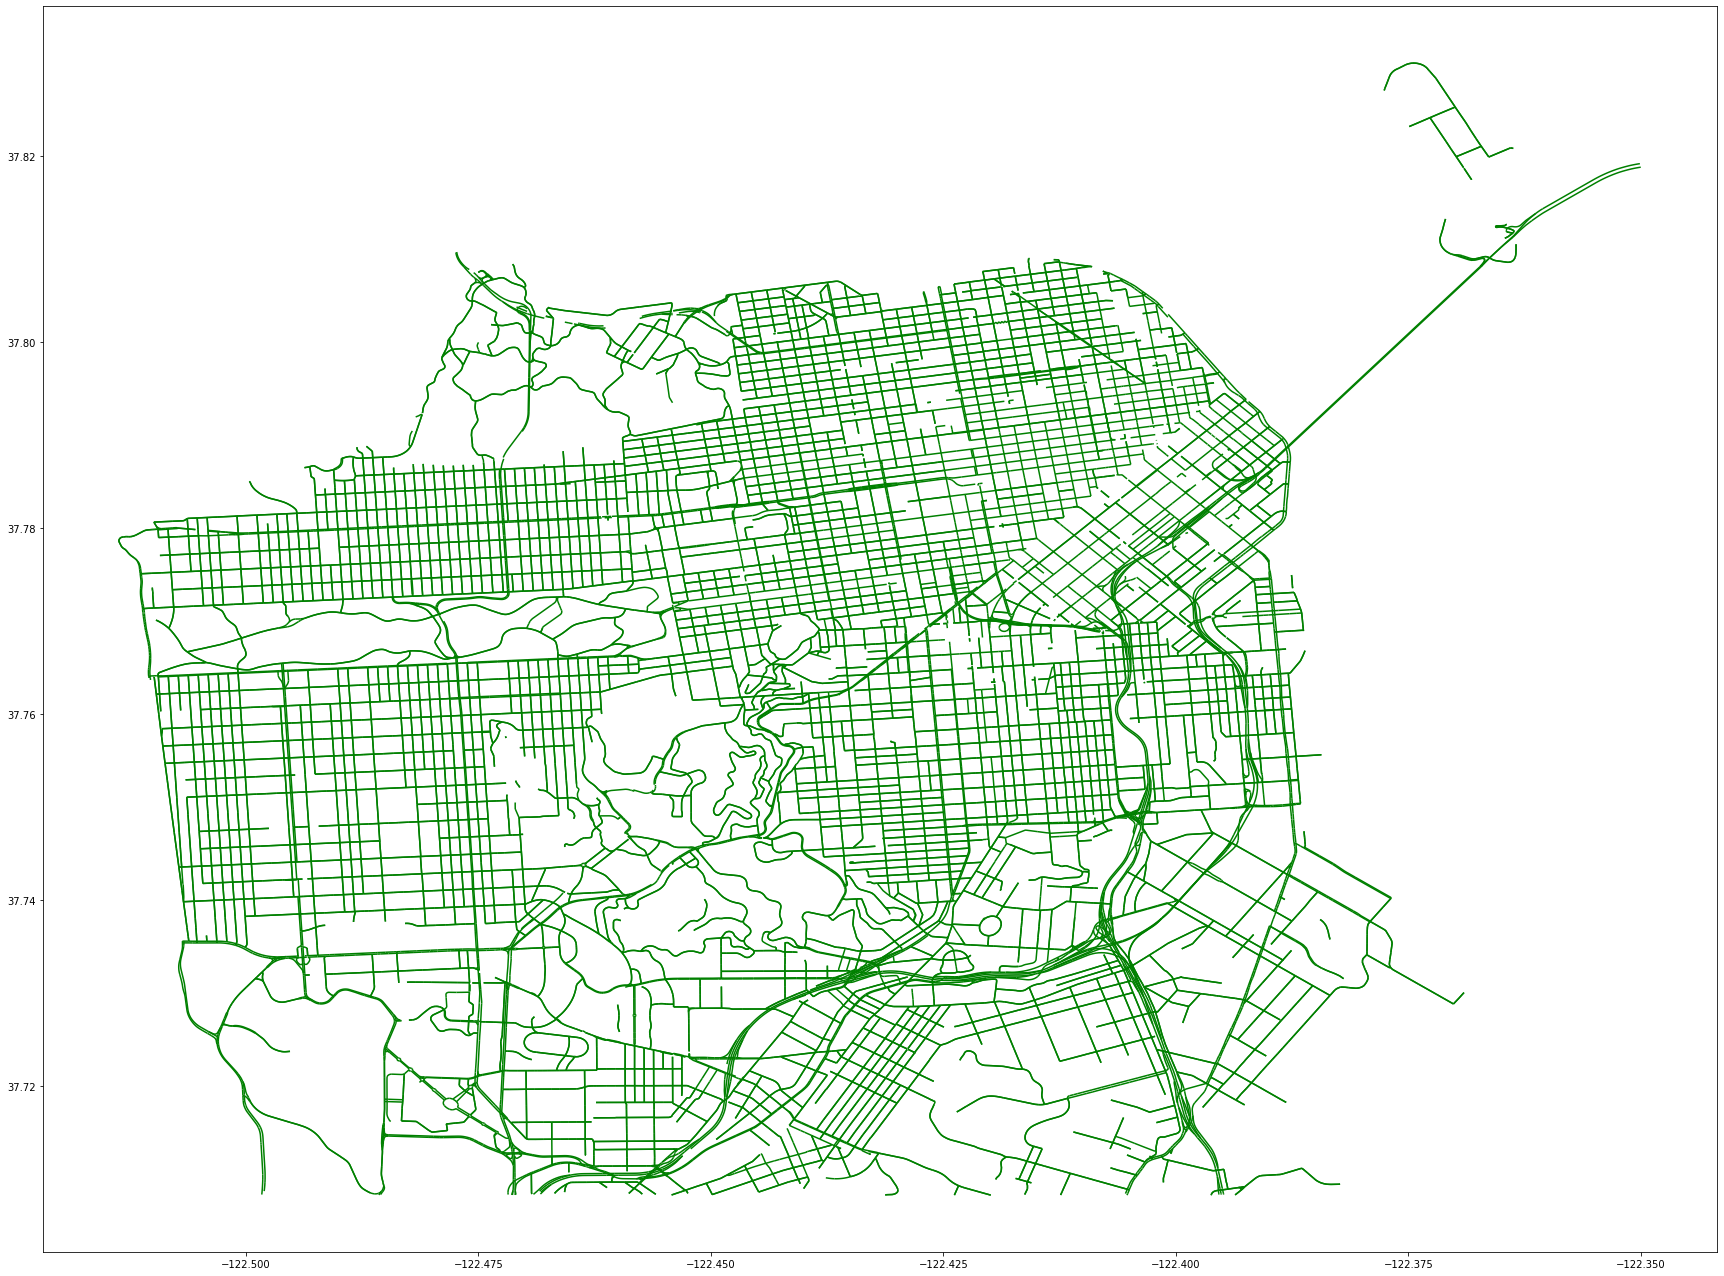

In [26]:
#Weekend valid road plot
fig, ax = plt.subplots(figsize=(30,30))
segments_join_wkend.plot(ax=ax, linewidth=1.5,edgecolor = 'green')
plt.show()

<h2>PART III. Draw isochrone map use OSMnx

<h3> Prepare for the base data

In [27]:
weekday = segments_join_wkday
weekend = segments_join_wkend

In [28]:
# 1.1 Get the nodes from the original projected database
gdf_nodes, gdf_edges = ox.graph_to_gdfs(G_proj, nodes=True, edges=True, node_geometry=True, fill_edge_geometry=True)
gdf_nodes

y           x       osmid          highway  ref  \
287834139   37.747222 -122.459269   287834139  traffic_signals  NaN   
65337375    37.796634 -122.401871    65337375  traffic_signals  NaN   
275513443   37.743994 -122.421929   275513443              NaN  NaN   
1636827301  37.739723 -122.409513  1636827301              NaN  NaN   
1636827304  37.748331 -122.412609  1636827304              NaN  NaN   
...               ...         ...         ...              ...  ...   
360447866   37.749147 -122.443057   360447866              NaN  NaN   
360447902   37.748743 -122.443477   360447902              NaN  NaN   
4784127936  37.775829 -122.446343  4784127936         crossing  NaN   
4784127935  37.775791 -122.446636  4784127935         crossing  NaN   
4784127976  37.779755 -122.438729  4784127976         crossing  NaN   

                   lon        lat                     geometry  
287834139  -122.459269  37.747222  POINT (-122.45927 37.74722)  
65337375   -122.401871  37.796634  POINT (-122.40187 37.79663)  
275513443  -122.421929  37.743994  POINT (-122.42193 37.74399)  
1636827301 -122.409513  37.739723  POINT (-122.40951 37.73972)  
1636827304 -122.412609  37.748331  POINT (-122.41261 37.74833)  
...                ...        ...                          ...  
360447866  -122.443057  37.749147  POINT (-122.44306 37.74915)  
360447902  -122.443477  37.748743  POINT (-122.44348 37.74874)  
4784127936 -122.446343  37.775829  POINT (-122.44634 37.77583)  
4784127935 -122.446636  37.775791  POINT (-122.44664 37.77579)  
4784127976 -122.438729  37.779755  POINT (-122.43873 37.77976)  

[12710 rows x 8 columns]

<h3> Query list1-weekday

In [29]:
# 2.1 Building query list
network_type = 'driving'
trip_times = [5, 10, 15, 20] #in minutes
day = 'weekday' #how to query this to the weekday dataframe?
time = 'PM'
place = [-122.416257,37.773794] # select a place in san francisco

In [30]:
center_node = ox.get_nearest_node(G_proj, (place[1], place[0]))
center_node

65325013

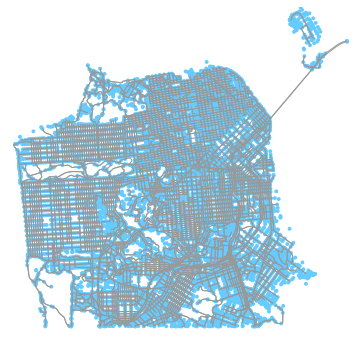

In [31]:
#2.2 Transfer from geodataframe to networkX, instead of gdf_edges, use weekday dataframe which has road speed data.
G = ox.gdfs_to_graph(gdf_nodes,weekday)
fig, ax = ox.plot_graph(G)

In [32]:
# 2.3 add an edge attribute for time in minutes required to traverse each edge
for u, v, k, data in G.edges(data=True, keys=True):
    data['time'] = data['length'] / (data['PM']* 26.8224) #mph to m per minute

In [33]:
# 2.4 get one color for each isochrone
iso_colors = ox.get_colors(n=len(trip_times), cmap='Reds', start=0.3, return_hex=True)

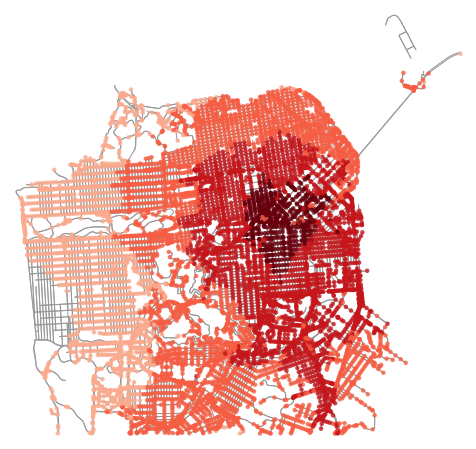

In [34]:
# 2.5 color the nodes according to isochrone then plot the street network
node_colors = {}
for trip_time, color in zip(sorted(trip_times, reverse=True), iso_colors):
    subgraph = nx.ego_graph(G, center_node, radius=trip_time, distance='time')
    for node in subgraph.nodes():
        node_colors[node] = color
nc = [node_colors[node] if node in node_colors else 'none' for node in G.nodes()]
ns = [20 if node in node_colors else 0 for node in G.nodes()]
fig, ax = ox.plot_graph(G, fig_height=8, node_color=nc, node_size=ns, node_alpha=0.8, node_zorder=2)

<h3> Query list2-weekday

In [35]:
# 3.1 Building query list2
network_type = 'driving'
trip_times = [5, 10, 15, 20] #in minutes
day = 'weekday' #how to query this to the weekday dataframe?
time = 'AM'
place = [-122.441384,37.788329] # select a place in san francisco 37.762949, -122.448193,37.788329, -122.441384

# 3.2 get one color for each isochrone
iso_colors = ox.get_colors(n=len(trip_times), cmap='Blues', start=0.3, return_hex=True)

In [36]:
center_node = ox.get_nearest_node(G_proj, (place[1], place[0]))
center_node

65295375

In [37]:
for u, v, k, data in G.edges(data=True, keys=True):
    data['time'] = data['length'] / (data['AM']* 26.8224) #mph to m per minute

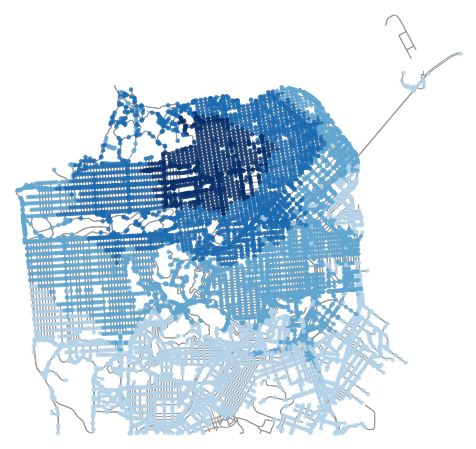

In [38]:
# 3.3 color the nodes according to isochrone then plot the street network
node_colors = {}
for trip_time, color in zip(sorted(trip_times, reverse=True), iso_colors):
    subgraph = nx.ego_graph(G, center_node, radius=trip_time, distance='time')
    for node in subgraph.nodes():
        node_colors[node] = color
nc = [node_colors[node] if node in node_colors else 'none' for node in G.nodes()]
ns = [20 if node in node_colors else 0 for node in G.nodes()]
fig, ax = ox.plot_graph(G, fig_height=8, node_color=nc, node_size=ns, node_alpha=0.8, node_zorder=2)

<h3> Query list2-weekend

In [39]:
#4.1 Building query list3
network_type = 'driving'
trip_times = [5, 10, 15, 20] #in minutes
day = 'weekend' #how to query this to the weekday dataframe?
time = 'AM'
place = [-122.441384,37.788329]

In [40]:
center_node = ox.get_nearest_node(G_proj, (place[1], place[0]))
center_node

65295375

In [41]:
G = ox.gdfs_to_graph(gdf_nodes,weekend)
for u, v, k, data in G.edges(data=True, keys=True):
    data['time'] = data['length'] / (data['AM']* 26.8224) #mph to m per minute

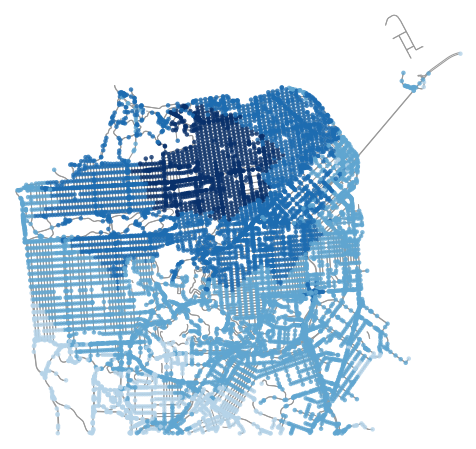

In [42]:
# 4.2 color the nodes according to isochrone then plot the street network
node_colors = {}
for trip_time, color in zip(sorted(trip_times, reverse=True), iso_colors):
    subgraph = nx.ego_graph(G, center_node, radius=trip_time, distance='time')
    for node in subgraph.nodes():
        node_colors[node] = color
nc = [node_colors[node] if node in node_colors else 'none' for node in G.nodes()]
ns = [20 if node in node_colors else 0 for node in G.nodes()]
fig, ax = ox.plot_graph(G, fig_height=8, node_color=nc, node_size=ns, node_alpha=0.8, node_zorder=2)

In [43]:
#limitation: Don't include one-way direction road

<h2>PART IV. Visualize road speed/max speed index

<h3> visualization1

In [44]:
#1.1 See different road type road limitation average
segments_maxspeed.groupby('highway').mean()[['maxspeed2']]

maxspeed2
highway                  
motorway        50.605381
motorway_link   46.190476
primary         31.136609
primary_link    31.000000
residential     25.866873
secondary       28.774126
secondary_link  33.409091
tertiary        26.195652
tertiary_link   25.000000
trunk           43.022388
trunk_link      45.952381
unclassified    18.387097

In [53]:
#1.2 Set a new column and import the maxspeed data.(integer)
##weekday
segments_join_wkday.loc[segments_join_wkday['highway'] == 'motorway','maxspeed2']= 51
segments_join_wkday.loc[segments_join_wkday['highway'] == 'motorway_link','maxspeed2']= 46
segments_join_wkday.loc[segments_join_wkday['highway'] == 'primary','maxspeed2']= 31
segments_join_wkday.loc[segments_join_wkday['highway'] == 'primary_link','maxspeed2']= 31
segments_join_wkday.loc[segments_join_wkday['highway'] == 'residential','maxspeed2']= 26
segments_join_wkday.loc[segments_join_wkday['highway'] == 'secondary','maxspeed2']= 29
segments_join_wkday.loc[segments_join_wkday['highway'] == 'secondary_link','maxspeed2']= 33
segments_join_wkday.loc[segments_join_wkday['highway'] == 'tertiary','maxspeed2']= 26
segments_join_wkday.loc[segments_join_wkday['highway'] == 'tertiary_link','maxspeed2']= 25
segments_join_wkday.loc[segments_join_wkday['highway'] == 'trunk','maxspeed2']= 43
segments_join_wkday.loc[segments_join_wkday['highway'] == 'trunk_link','maxspeed2']= 46
segments_join_wkday.loc[segments_join_wkday['highway'] == 'unclassified','maxspeed2']= 18
##weekend
segments_join_wkend.loc[segments_join_wkend['highway'] == 'motorway','maxspeed2']= 51
segments_join_wkend.loc[segments_join_wkend['highway'] == 'motorway_link','maxspeed2']= 46
segments_join_wkend.loc[segments_join_wkend['highway'] == 'primary','maxspeed2']= 31
segments_join_wkend.loc[segments_join_wkend['highway'] == 'primary_link','maxspeed2']= 31
segments_join_wkend.loc[segments_join_wkend['highway'] == 'residential','maxspeed2']= 26
segments_join_wkend.loc[segments_join_wkend['highway'] == 'secondary','maxspeed2']= 29
segments_join_wkend.loc[segments_join_wkend['highway'] == 'secondary_link','maxspeed2']= 33
segments_join_wkend.loc[segments_join_wkend['highway'] == 'tertiary','maxspeed2']= 26
segments_join_wkend.loc[segments_join_wkend['highway'] == 'tertiary_link','maxspeed2']= 25
segments_join_wkend.loc[segments_join_wkend['highway'] == 'trunk','maxspeed2']= 43
segments_join_wkend.loc[segments_join_wkend['highway'] == 'trunk_link','maxspeed2']= 46
segments_join_wkend.loc[segments_join_wkend['highway'] == 'unclassified','maxspeed2']= 18

weekday = segments_join_wkday.copy()
weekend = segments_join_wkend.copy()

In [54]:
#1.2 Road speed/Maxspeed index
##weekday
weekday['AM_diff'] = weekday['AM']/weekday['maxspeed2']
weekday['MID-DAY_diff'] = weekday['MID-DAY']/weekday['maxspeed2']
weekday['PM_diff'] = weekday['PM']/weekday['maxspeed2']
weekday['NIGHT_diff'] = weekday['NIGHT']/weekday['maxspeed2']
##weekend
weekend['AM_diff'] = weekend['AM']/weekday['maxspeed2']
weekend['MID-DAY_diff'] = weekend['MID-DAY']/weekday['maxspeed2']
weekend['PM_diff'] = weekend['PM']/weekday['maxspeed2']
weekend['NIGHT_diff'] = weekend['NIGHT']/weekday['maxspeed2']

In [55]:
#2.1 Color index depends on the value of index
## Weekday
weekday.loc[(weekday['AM_diff']>0)&(weekday['AM_diff']<0.51), 'AM_colour'] = '#700404' # Dark red
weekday.loc[(weekday['AM_diff']>=0.51)&(weekday['AM_diff']<0.64), 'AM_colour'] = '#f60404' #red
weekday.loc[(weekday['AM_diff']>=0.64)&(weekday['AM_diff']<0.8), 'AM_colour'] = '#ffa500' #orange
weekday.loc[(weekday['AM_diff']>=0.8)&(weekday['AM_diff']<1), 'AM_colour'] = '#99cc99' #green
weekday.loc[weekday['AM_diff']>=1, 'AM_colour'] = '#b3cc99' #light green

weekday.loc[(weekday['MID-DAY_diff']>0)&(weekday['MID-DAY_diff']<0.51), 'MID-DAY_colour'] = '#700404' # Dark red
weekday.loc[(weekday['MID-DAY_diff']>=0.51)&(weekday['MID-DAY_diff']<0.64), 'MID-DAY_colour'] = '#f60404' #red
weekday.loc[(weekday['MID-DAY_diff']>=0.64)&(weekday['MID-DAY_diff']<0.8), 'MID-DAY_colour'] = '#ffa500' #orange
weekday.loc[(weekday['MID-DAY_diff']>=0.8)&(weekday['MID-DAY_diff']<1), 'MID-DAY_colour'] = '#99cc99' #green
weekday.loc[weekday['MID-DAY_diff']>=1,'MID-DAY_colour'] = '#b3cc99' #light green

weekday.loc[(weekday['PM_diff']>0)&(weekday['PM_diff']<0.51), 'PM_colour'] = '#700404' # Dark red
weekday.loc[(weekday['PM_diff']>=0.51)&(weekday['PM_diff']<0.64), 'PM_colour'] = '#f60404' #red
weekday.loc[(weekday['PM_diff']>=0.64)&(weekday['PM_diff']<0.8), 'PM_colour'] = '#ffa500' #orange
weekday.loc[(weekday['PM_diff']>=0.8)&(weekday['PM_diff']<1), 'PM_colour'] = '#99cc99' #green
weekday.loc[weekday['PM_diff']>=1, 'PM_colour'] = '#b3cc99' #light green

weekday.loc[(weekday['NIGHT_diff']>0)&(weekday['NIGHT_diff']<0.51), 'NIGHT_colour'] = '#700404' # Dark red
weekday.loc[(weekday['NIGHT_diff']>=0.51)&(weekday['NIGHT_diff']<0.64), 'NIGHT_colour'] = '#f60404' #red
weekday.loc[(weekday['NIGHT_diff']>=0.64)&(weekday['NIGHT_diff']<0.8), 'NIGHT_colour'] = '#ffa500' #orange
weekday.loc[(weekday['NIGHT_diff']>=0.8)&(weekday['NIGHT_diff']<1), 'NIGHT_colour'] = '#99cc99' #green
weekday.loc[weekday['NIGHT_diff']>=1, 'NIGHT_colour'] = '#b3cc99' #light green

## Weekend
weekend.loc[(weekend['AM_diff']>0)&(weekend['AM_diff']<0.51), 'AM_colour'] = '#700404' # Dark red
weekend.loc[(weekend['AM_diff']>=0.51)&(weekend['AM_diff']<0.64), 'AM_colour'] = '#f60404' #red
weekend.loc[(weekend['AM_diff']>=0.64)&(weekend['AM_diff']<0.8), 'AM_colour'] = '#ffa500' #orange
weekend.loc[(weekend['AM_diff']>=0.8)&(weekend['AM_diff']<1), 'AM_colour'] = '#99cc99' #green
weekend.loc[weekend['AM_diff']>=1, 'AM_colour'] = '#b3cc99' #light green

weekend.loc[(weekend['MID-DAY_diff']>0)&(weekend['MID-DAY_diff']<0.51), 'MID-DAY_colour'] = '#700404' # Dark red
weekend.loc[(weekend['MID-DAY_diff']>=0.51)&(weekend['MID-DAY_diff']<0.64), 'MID-DAY_colour'] = '#f60404' #red
weekend.loc[(weekend['MID-DAY_diff']>=0.64)&(weekend['MID-DAY_diff']<0.8), 'MID-DAY_colour'] = '#ffa500' #orange
weekend.loc[(weekend['MID-DAY_diff']>=0.8)&(weekend['MID-DAY_diff']<1), 'MID-DAY_colour'] = '#99cc99' #green
weekend.loc[weekend['MID-DAY_diff']>=1, 'MID-DAY_colour'] = '#b3cc99' #light green

weekend.loc[(weekend['PM_diff']>0)&(weekend['PM_diff']<0.51), 'PM_colour'] = '#700404' # Dark red
weekend.loc[(weekend['PM_diff']>=0.51)&(weekend['PM_diff']<0.64), 'PM_colour'] = '#f60404' #red
weekend.loc[(weekend['PM_diff']>=0.64)&(weekend['PM_diff']<0.8), 'PM_colour'] = '#ffa500' #orange
weekend.loc[(weekend['PM_diff']>=0.8)&(weekend['PM_diff']<1), 'PM_colour'] = '#99cc99' #green
weekend.loc[weekend['PM_diff']>=1, 'PM_colour'] = '#b3cc99' #light green

weekend.loc[(weekend['NIGHT_diff']>0)&(weekend['NIGHT_diff']<0.51), 'NIGHT_colour'] = '#700404' # Dark red
weekend.loc[(weekend['NIGHT_diff']>=0.51)&(weekend['NIGHT_diff']<0.64), 'NIGHT_colour'] = '#f60404' #red
weekend.loc[(weekend['NIGHT_diff']>=0.64)&(weekend['NIGHT_diff']<0.8), 'NIGHT_colour'] = '#ffa500' #orange
weekend.loc[(weekend['NIGHT_diff']>=0.8)&(weekend['NIGHT_diff']<1), 'NIGHT_colour'] = '#99cc99' #green
weekend.loc[weekend['NIGHT_diff']>=1, 'NIGHT_colour'] = '#b3cc99' #light green

In [56]:
weekend

u           v  key      osmid  oneway      highway  \
0       287834139    65312832    0  133743842    True    secondary   
1       287834139  6902779320    0  503825191    True    secondary   
2        65337375    65359314    0   25372358   False     tertiary   
3        65359314    65337375    0   25372358   False     tertiary   
4        65337375  3836814558    0  425516652   False     tertiary   
...           ...         ...  ...        ...     ...          ...   
21453  4021550367  4021550360    0  396989358    True      primary   
21454  5590744546    65287360    0  584944917    True    secondary   
21455  3526885173  3885158728    0  385163271    True  residential   
21456  3526885173    65346168    0  516185201    True    secondary   
21457  4784127976    65339315    0  254448242    True    secondary   

                         name maxspeed   length  \
0             Dewey Boulevard   25 mph   11.204   
1      Laguna Honda Boulevard      NaN   12.120   
2              Sansome Street      NaN  102.552   
3              Sansome Street      NaN  102.552   
4              Sansome Street      NaN   49.126   
...                       ...      ...      ...   
21453     Cesar Chavez Street      NaN   88.273   
21454         Crossover Drive      NaN   63.335   
21455             State Drive      NaN   12.630   
21456   Lake Merced Boulevard   40 mph  202.179   
21457       Divisadero Street      NaN   95.458   

                                                geometry  ...         PM  \
0      LINESTRING (-122.45927 37.74722, -122.45914 37...  ...  20.297479   
1      LINESTRING (-122.45927 37.74722, -122.45918 37...  ...  18.338531   
2      LINESTRING (-122.40187 37.79663, -122.40186 37...  ...  20.215906   
3      LINESTRING (-122.40169 37.79572, -122.40171 37...  ...  20.215906   
4      LINESTRING (-122.40187 37.79663, -122.40188 37...  ...  21.507375   
...                                                  ...  ...        ...   
21453  LINESTRING (-122.42030 37.74817, -122.42044 37...  ...  24.149250   
21454  LINESTRING (-122.48389 37.77208, -122.48393 37...  ...   8.668531   
21455  LINESTRING (-122.48462 37.72496, -122.48476 37...  ...  15.875000   
21456  LINESTRING (-122.48462 37.72496, -122.48398 37...  ...  30.309594   
21457  LINESTRING (-122.43873 37.77976, -122.43886 37...  ...  10.344844   

      maxspeed2   AM_diff MID-DAY_diff   PM_diff NIGHT_diff AM_colour  \
0          29.0  0.743687     0.701229  0.699913   0.630038   #ffa500   
1          29.0  0.613193     0.639885  0.632363   0.612622   #f60404   
2          26.0  0.924179     0.772271  0.777535   0.842410   #99cc99   
3          26.0  0.924179     0.772271  0.777535   0.842410   #99cc99   
4          26.0  0.941447     0.779174  0.827207   0.853313   #99cc99   
...         ...       ...          ...       ...        ...       ...   
21453      31.0  1.066880     0.909942  0.928817   1.026047   #b3cc99   
21454      29.0  0.303092     0.284724  0.298915   0.296652   #700404   
21455      26.0  0.610577     0.610577  0.610577   0.610577   #f60404   
21456      29.0  1.309423     1.060155  1.165754   1.270070   #b3cc99   
21457      29.0  0.473684     0.381020  0.397879   0.458613   #700404   

      MID-DAY_colour  PM_colour  NIGHT_colour  
0            #ffa500    #ffa500       #f60404  
1            #f60404    #f60404       #f60404  
2            #ffa500    #ffa500       #99cc99  
3            #ffa500    #ffa500       #99cc99  
4            #ffa500    #99cc99       #99cc99  
...              ...        ...           ...  
21453        #99cc99    #99cc99       #b3cc99  
21454        #700404    #700404       #700404  
21455        #f60404    #f60404       #f60404  
21456        #b3cc99    #b3cc99       #b3cc99  
21457        #700404    #700404       #700404  

[21458 rows x 31 columns]

In [57]:
#Drop NaN in case.
weekday = weekday.dropna(subset = ['AM_colour','MID-DAY_colour','PM_colour','NIGHT_colour'])
weekend = weekend.dropna(subset = ['AM_colour','MID-DAY_colour','PM_colour','NIGHT_colour'])

In [59]:
weekend

u           v  key      osmid  oneway      highway  \
0       287834139    65312832    0  133743842    True    secondary   
1       287834139  6902779320    0  503825191    True    secondary   
2        65337375    65359314    0   25372358   False     tertiary   
3        65359314    65337375    0   25372358   False     tertiary   
4        65337375  3836814558    0  425516652   False     tertiary   
...           ...         ...  ...        ...     ...          ...   
21453  4021550367  4021550360    0  396989358    True      primary   
21454  5590744546    65287360    0  584944917    True    secondary   
21455  3526885173  3885158728    0  385163271    True  residential   
21456  3526885173    65346168    0  516185201    True    secondary   
21457  4784127976    65339315    0  254448242    True    secondary   

                         name maxspeed   length  \
0             Dewey Boulevard   25 mph   11.204   
1      Laguna Honda Boulevard      NaN   12.120   
2              Sansome Street      NaN  102.552   
3              Sansome Street      NaN  102.552   
4              Sansome Street      NaN   49.126   
...                       ...      ...      ...   
21453     Cesar Chavez Street      NaN   88.273   
21454         Crossover Drive      NaN   63.335   
21455             State Drive      NaN   12.630   
21456   Lake Merced Boulevard   40 mph  202.179   
21457       Divisadero Street      NaN   95.458   

                                                geometry  ...         PM  \
0      LINESTRING (-122.45927 37.74722, -122.45914 37...  ...  20.297479   
1      LINESTRING (-122.45927 37.74722, -122.45918 37...  ...  18.338531   
2      LINESTRING (-122.40187 37.79663, -122.40186 37...  ...  20.215906   
3      LINESTRING (-122.40169 37.79572, -122.40171 37...  ...  20.215906   
4      LINESTRING (-122.40187 37.79663, -122.40188 37...  ...  21.507375   
...                                                  ...  ...        ...   
21453  LINESTRING (-122.42030 37.74817, -122.42044 37...  ...  24.149250   
21454  LINESTRING (-122.48389 37.77208, -122.48393 37...  ...   8.668531   
21455  LINESTRING (-122.48462 37.72496, -122.48476 37...  ...  15.875000   
21456  LINESTRING (-122.48462 37.72496, -122.48398 37...  ...  30.309594   
21457  LINESTRING (-122.43873 37.77976, -122.43886 37...  ...  10.344844   

      maxspeed2   AM_diff MID-DAY_diff   PM_diff NIGHT_diff AM_colour  \
0          29.0  0.743687     0.701229  0.699913   0.630038   #ffa500   
1          29.0  0.613193     0.639885  0.632363   0.612622   #f60404   
2          26.0  0.924179     0.772271  0.777535   0.842410   #99cc99   
3          26.0  0.924179     0.772271  0.777535   0.842410   #99cc99   
4          26.0  0.941447     0.779174  0.827207   0.853313   #99cc99   
...         ...       ...          ...       ...        ...       ...   
21453      31.0  1.066880     0.909942  0.928817   1.026047   #b3cc99   
21454      29.0  0.303092     0.284724  0.298915   0.296652   #700404   
21455      26.0  0.610577     0.610577  0.610577   0.610577   #f60404   
21456      29.0  1.309423     1.060155  1.165754   1.270070   #b3cc99   
21457      29.0  0.473684     0.381020  0.397879   0.458613   #700404   

      MID-DAY_colour  PM_colour  NIGHT_colour  
0            #ffa500    #ffa500       #f60404  
1            #f60404    #f60404       #f60404  
2            #ffa500    #ffa500       #99cc99  
3            #ffa500    #ffa500       #99cc99  
4            #ffa500    #99cc99       #99cc99  
...              ...        ...           ...  
21453        #99cc99    #99cc99       #b3cc99  
21454        #700404    #700404       #700404  
21455        #f60404    #f60404       #f60404  
21456        #b3cc99    #b3cc99       #b3cc99  
21457        #700404    #700404       #700404  

[21452 rows x 31 columns]

In [60]:
#2.1 Building query list
day = 'weekday'
time = 'PM'

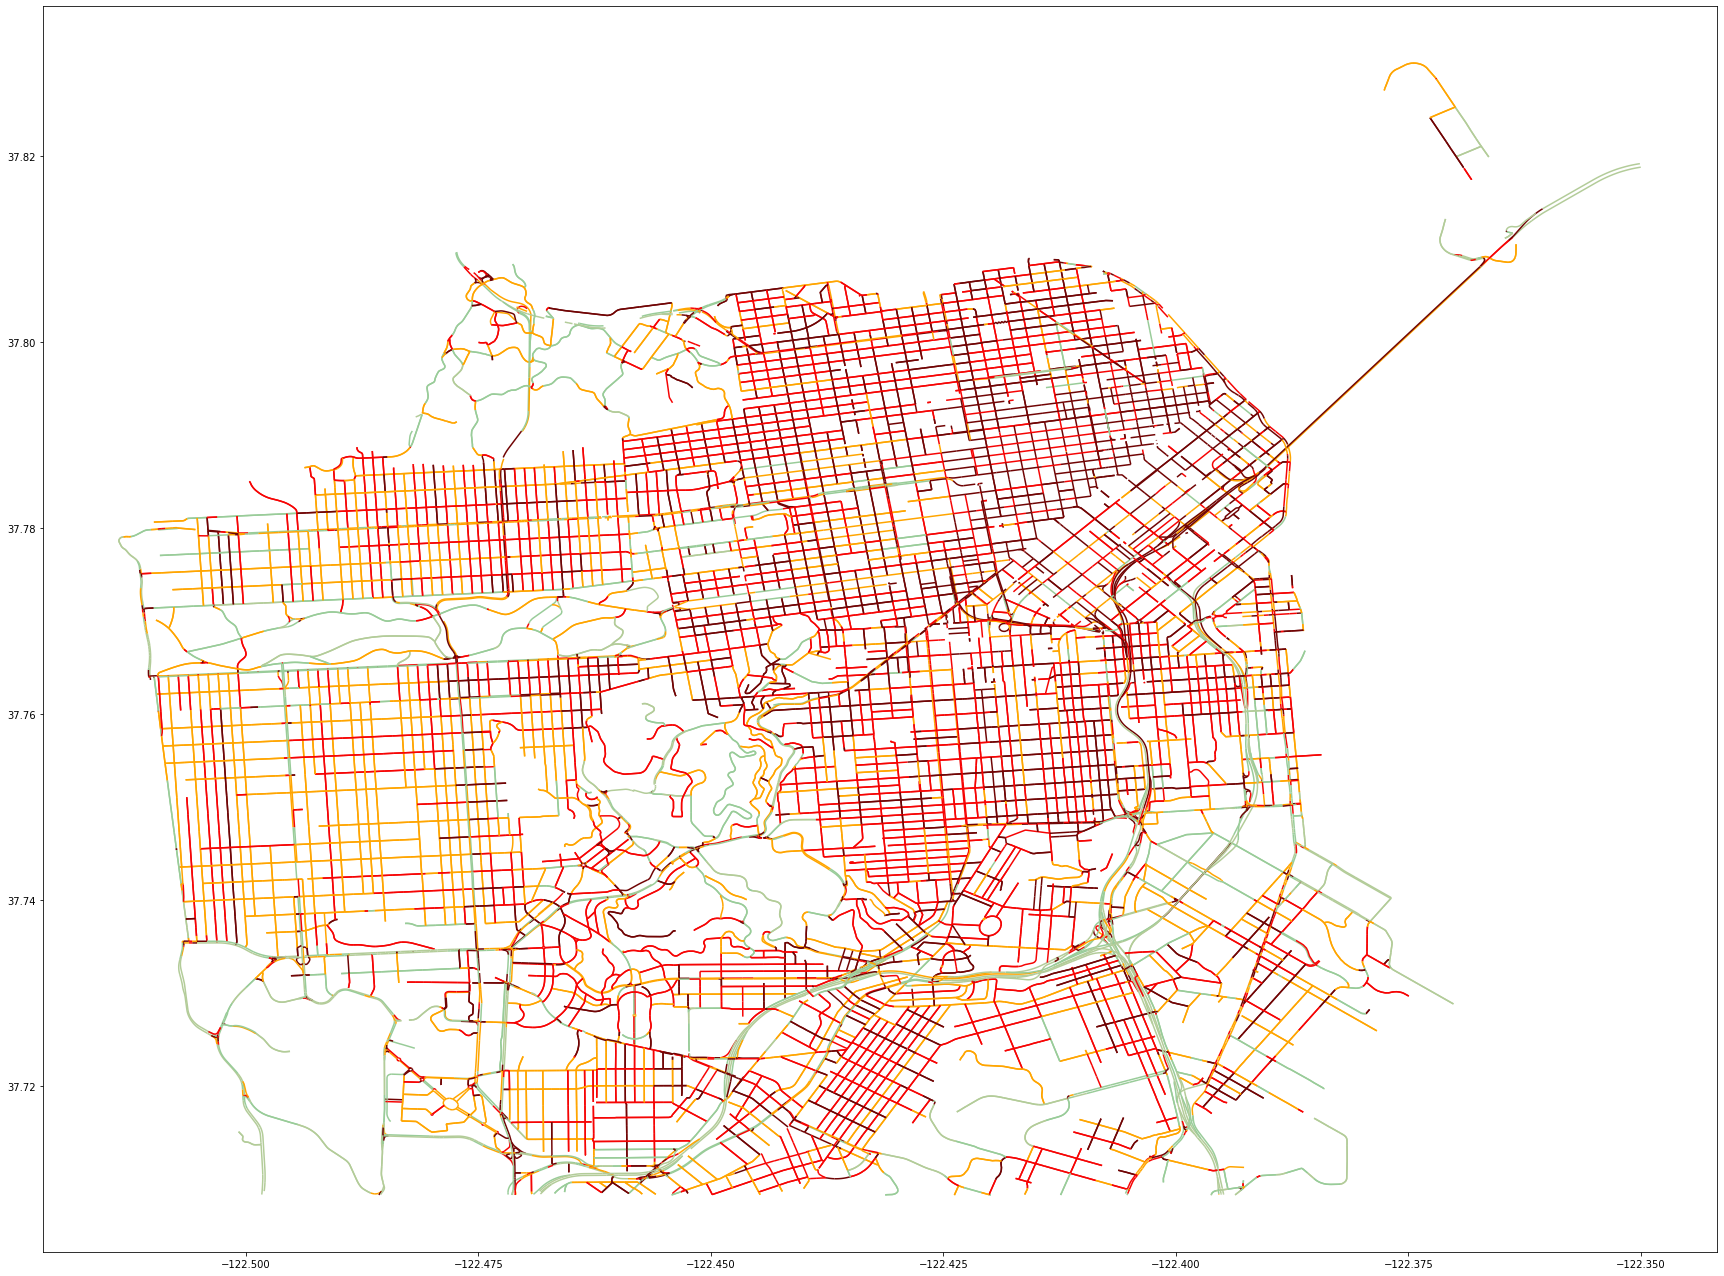

In [61]:
fig, ax = plt.subplots(figsize=(30,30))
weekday.plot(ax=ax, linewidth=1.5, edgecolor=weekday['PM_colour'])
plt.show()

In [62]:
#2.2 Building query list2
day = 'weekend'
time = 'AM'

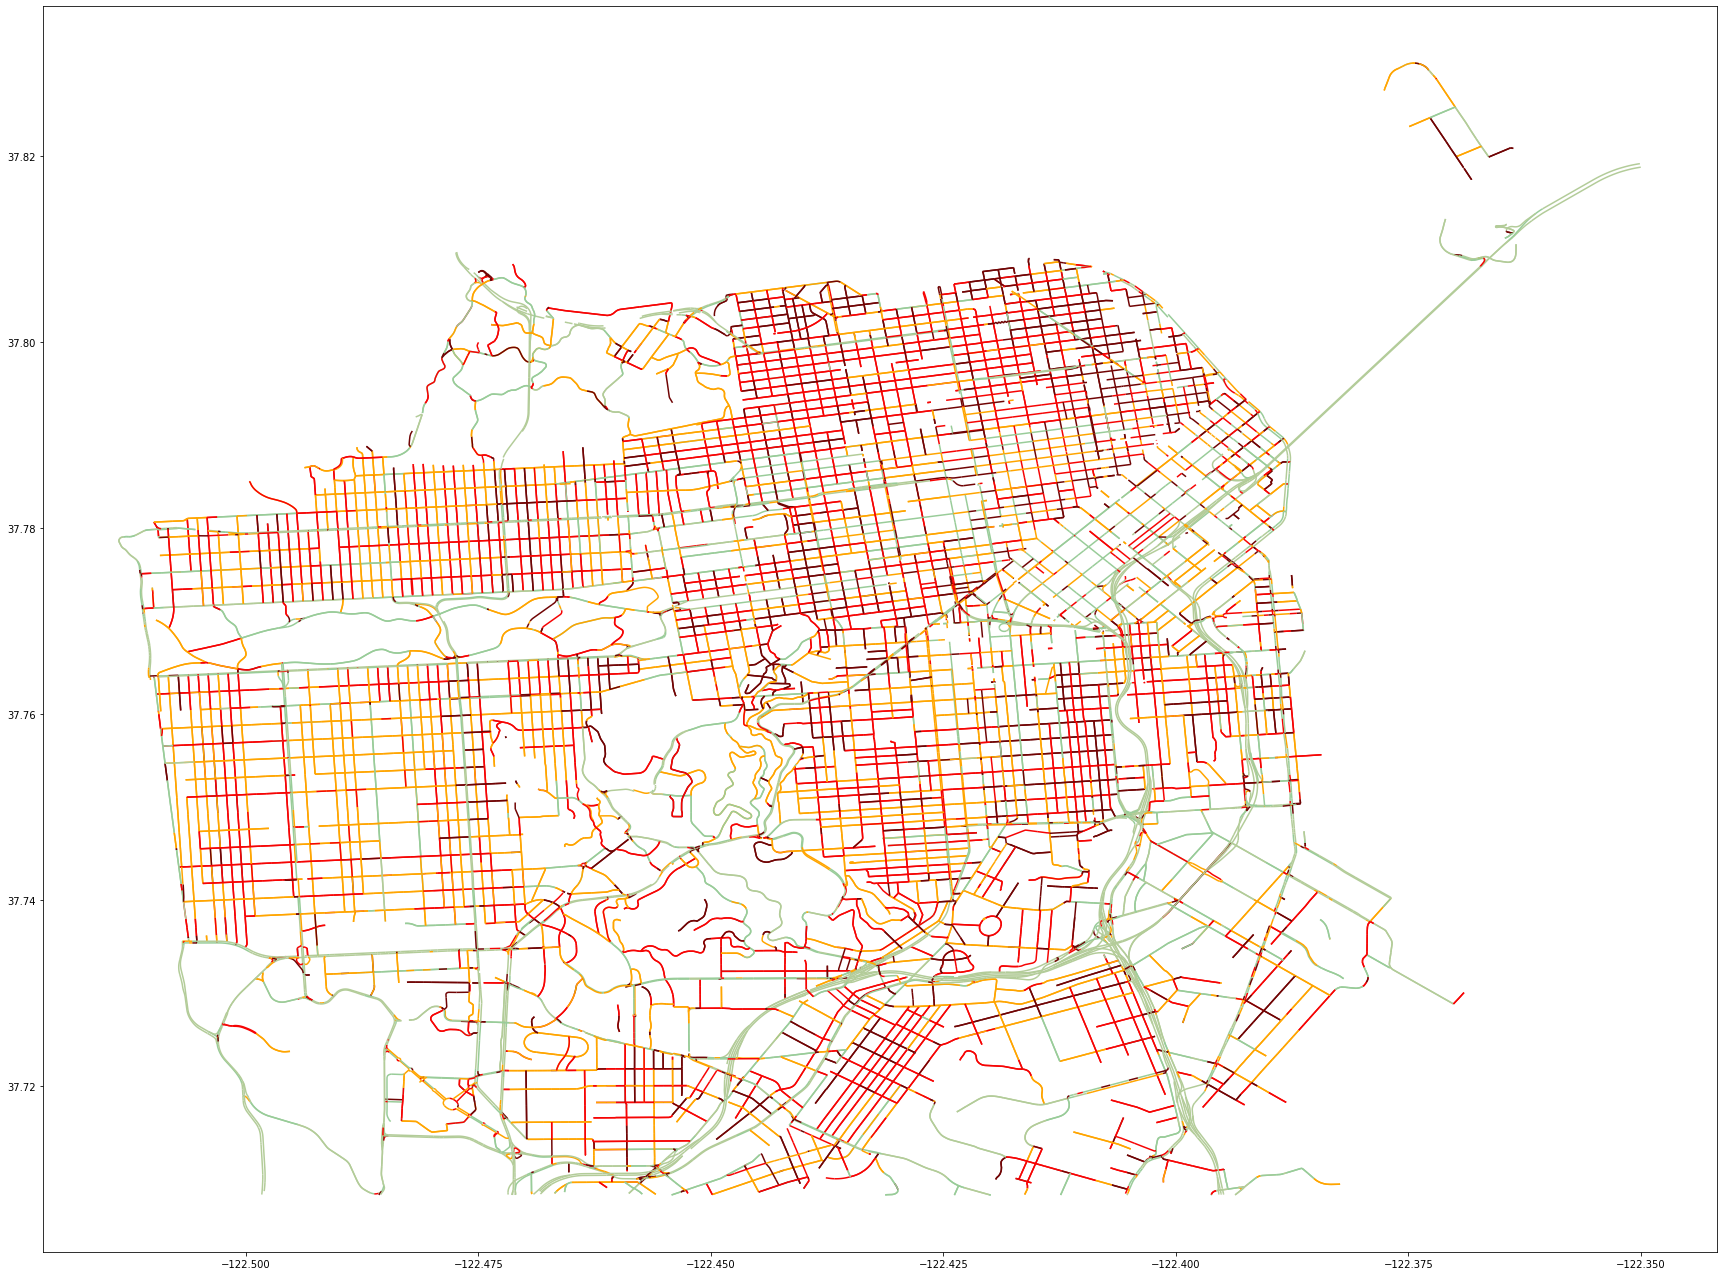

In [63]:
fig, ax = plt.subplots(figsize=(30,30))
weekend.plot(ax=ax, linewidth=1.5, edgecolor=weekend['AM_colour'])
plt.show()

<h3> Visualization2

Instead of fill NaN with other time road average, just keep the missing value as 0.

In [65]:
data_oct_wkday_time_pivot

Time period         AM    MID-DAY      NIGHT         PM
osm_way_id                                             
4304424      34.152854  33.478769  34.181987  22.131696
4311275      53.564337  63.513644  66.202885  42.738195
4311277      33.851808  36.293369  38.307108  34.549462
4311278      41.898165  51.035608  49.618054  49.686330
4311288      34.950215  35.141349  36.433744  35.142926
...                ...        ...        ...        ...
700422838    34.110009  31.858555  28.823208  25.075572
700434979    29.721024  27.912307  24.097000  30.118835
700434982    13.958958  15.775192  19.619865  16.796271
700434983    17.798487  20.532500  31.859500  27.024833
700434986    66.105517  61.121733  66.688397  42.118941

[73787 rows x 4 columns]

In [66]:
data_oct_wkend_time_pivot 

Time period         AM    MID-DAY      NIGHT         PM
osm_way_id                                             
4304424      35.096000  35.079528  34.429333  34.661200
4311275      67.977022  62.369336  66.540510  64.557472
4311277      36.418000  39.092500  39.652687  37.116881
4311278      51.057388  50.813426  49.757149  49.975965
4311288      36.629000  38.770000  36.643400  36.661500
...                ...        ...        ...        ...
700422838          NaN  33.409000        NaN        NaN
700434979          NaN  23.571000        NaN        NaN
700434982    19.041000  17.612833  19.316476  13.738125
700434983    29.386500  24.341000  31.285350  26.408625
700434986    67.637042  66.505333  66.161281  66.157125

[65999 rows x 4 columns]

In [68]:
#1.1 Fill NaN with 0 instead of road speed average
wkday_fillna = data_oct_wkday_time_pivot.fillna(0.00).reset_index()
wkend_fillna = data_oct_wkend_time_pivot.fillna(0.00).reset_index()

In [69]:
rd_weekday = wkday_fillna.rename(columns = {'osm_way_id':'osmid'})
segments_join_wkday = segments.merge(rd_weekday, on ='osmid')
rd_weekend = wkend_fillna.rename(columns = {'osm_way_id':'osmid'})
segments_join_wkend = segments.merge(rd_weekend, on ='osmid')

In [71]:
#1.2 Assign road type
##weekday
segments_join_wkday.loc[segments_join_wkday['highway'] == 'motorway','maxspeed2']= 51
segments_join_wkday.loc[segments_join_wkday['highway'] == 'motorway_link','maxspeed2']= 46
segments_join_wkday.loc[segments_join_wkday['highway'] == 'primary','maxspeed2']= 31
segments_join_wkday.loc[segments_join_wkday['highway'] == 'primary_link','maxspeed2']= 31
segments_join_wkday.loc[segments_join_wkday['highway'] == 'residential','maxspeed2']= 26
segments_join_wkday.loc[segments_join_wkday['highway'] == 'secondary','maxspeed2']= 29
segments_join_wkday.loc[segments_join_wkday['highway'] == 'secondary_link','maxspeed2']= 33
segments_join_wkday.loc[segments_join_wkday['highway'] == 'tertiary','maxspeed2']= 26
segments_join_wkday.loc[segments_join_wkday['highway'] == 'tertiary_link','maxspeed2']= 25
segments_join_wkday.loc[segments_join_wkday['highway'] == 'trunk','maxspeed2']= 43
segments_join_wkday.loc[segments_join_wkday['highway'] == 'trunk_link','maxspeed2']= 46
segments_join_wkday.loc[segments_join_wkday['highway'] == 'unclassified','maxspeed2']= 18
##weekend
segments_join_wkend.loc[segments_join_wkend['highway'] == 'motorway','maxspeed2']= 51
segments_join_wkend.loc[segments_join_wkend['highway'] == 'motorway_link','maxspeed2']= 46
segments_join_wkend.loc[segments_join_wkend['highway'] == 'primary','maxspeed2']= 31
segments_join_wkend.loc[segments_join_wkend['highway'] == 'primary_link','maxspeed2']= 31
segments_join_wkend.loc[segments_join_wkend['highway'] == 'residential','maxspeed2']= 26
segments_join_wkend.loc[segments_join_wkend['highway'] == 'secondary','maxspeed2']= 29
segments_join_wkend.loc[segments_join_wkend['highway'] == 'secondary_link','maxspeed2']= 33
segments_join_wkend.loc[segments_join_wkend['highway'] == 'tertiary','maxspeed2']= 26
segments_join_wkend.loc[segments_join_wkend['highway'] == 'tertiary_link','maxspeed2']= 25
segments_join_wkend.loc[segments_join_wkend['highway'] == 'trunk','maxspeed2']= 43
segments_join_wkend.loc[segments_join_wkend['highway'] == 'trunk_link','maxspeed2']= 46
segments_join_wkend.loc[segments_join_wkend['highway'] == 'unclassified','maxspeed2']= 18

weekday = segments_join_wkday.copy()
weekend = segments_join_wkend.copy()

In [72]:
#1.3 use time road data divided by maxspeed
##weekday
weekday['AM_diff'] = weekday['AM']/weekday['maxspeed2']
weekday['MID-DAY_diff'] = weekday['MID-DAY']/weekday['maxspeed2']
weekday['PM_diff'] = weekday['PM']/weekday['maxspeed2']
weekday['NIGHT_diff'] = weekday['NIGHT']/weekday['maxspeed2']
##weekend
weekend['AM_diff'] = weekend['AM']/weekday['maxspeed2']
weekend['MID-DAY_diff'] = weekend['MID-DAY']/weekday['maxspeed2']
weekend['PM_diff'] = weekend['PM']/weekday['maxspeed2']
weekend['NIGHT_diff'] = weekend['NIGHT']/weekday['maxspeed2']

In [73]:
#1.4 Assign colour to different index
## Weekday
weekday.loc[weekday['AM_diff']==0.00, 'AM_colour'] = 'grey'
weekday.loc[(weekday['AM_diff']>0)&(weekday['AM_diff']<0.51), 'AM_colour'] = '#700404' # Dark red
weekday.loc[(weekday['AM_diff']>=0.51)&(weekday['AM_diff']<0.64), 'AM_colour'] = '#f60404' #red
weekday.loc[(weekday['AM_diff']>=0.64)&(weekday['AM_diff']<0.8), 'AM_colour'] = '#ffa500' #orange
weekday.loc[(weekday['AM_diff']>=0.8)&(weekday['AM_diff']<1), 'AM_colour'] = '#99cc99' #green
weekday.loc[weekday['AM_diff']>=1, 'AM_colour'] = '#b3cc99' #light green

weekday.loc[weekday['MID-DAY_diff']==0.00, 'MID-DAY_colour'] = 'grey'
weekday.loc[(weekday['MID-DAY_diff']>0)&(weekday['MID-DAY_diff']<0.51), 'MID-DAY_colour'] = '#700404' # Dark red
weekday.loc[(weekday['MID-DAY_diff']>=0.51)&(weekday['MID-DAY_diff']<0.64), 'MID-DAY_colour'] = '#f60404' #red
weekday.loc[(weekday['MID-DAY_diff']>=0.64)&(weekday['MID-DAY_diff']<0.8), 'MID-DAY_colour'] = '#ffa500' #orange
weekday.loc[(weekday['MID-DAY_diff']>=0.8)&(weekday['MID-DAY_diff']<1), 'MID-DAY_colour'] = '#99cc99' #green
weekday.loc[weekday['MID-DAY_diff']>=1,'MID-DAY_colour'] = '#b3cc99' #light green

weekday.loc[weekday['PM_diff']==0.00, 'PM_colour'] = 'grey'
weekday.loc[(weekday['PM_diff']>0)&(weekday['PM_diff']<0.51), 'PM_colour'] = '#700404' # Dark red
weekday.loc[(weekday['PM_diff']>=0.51)&(weekday['PM_diff']<0.64), 'PM_colour'] = '#f60404' #red
weekday.loc[(weekday['PM_diff']>=0.64)&(weekday['PM_diff']<0.8), 'PM_colour'] = '#ffa500' #orange
weekday.loc[(weekday['PM_diff']>=0.8)&(weekday['PM_diff']<1), 'PM_colour'] = '#99cc99' #green
weekday.loc[weekday['PM_diff']>=1, 'PM_colour'] = '#b3cc99' #light green

weekday.loc[weekday['NIGHT_diff']==0.00, 'NIGHT_colour'] = 'grey'
weekday.loc[(weekday['NIGHT_diff']>0)&(weekday['NIGHT_diff']<0.51), 'NIGHT_colour'] = '#700404' # Dark red
weekday.loc[(weekday['NIGHT_diff']>=0.51)&(weekday['NIGHT_diff']<0.64), 'NIGHT_colour'] = '#f60404' #red
weekday.loc[(weekday['NIGHT_diff']>=0.64)&(weekday['NIGHT_diff']<0.8), 'NIGHT_colour'] = '#ffa500' #orange
weekday.loc[(weekday['NIGHT_diff']>=0.8)&(weekday['NIGHT_diff']<1), 'NIGHT_colour'] = '#99cc99' #green
weekday.loc[weekday['NIGHT_diff']>=1, 'NIGHT_colour'] = '#b3cc99' #light green

## Weekend
weekend.loc[weekend['AM_diff']==0.00, 'AM_colour'] = 'grey'
weekend.loc[(weekend['AM_diff']>0)&(weekend['AM_diff']<0.51), 'AM_colour'] = '#700404' # Dark red
weekend.loc[(weekend['AM_diff']>=0.51)&(weekend['AM_diff']<0.64), 'AM_colour'] = '#f60404' #red
weekend.loc[(weekend['AM_diff']>=0.64)&(weekend['AM_diff']<0.8), 'AM_colour'] = '#ffa500' #orange
weekend.loc[(weekend['AM_diff']>=0.8)&(weekend['AM_diff']<1), 'AM_colour'] = '#99cc99' #green
weekend.loc[weekend['AM_diff']>=1, 'AM_colour'] = '#b3cc99' #light green

weekend.loc[weekend['MID-DAY_diff']==0.00, 'MID-DAY_colour'] = 'grey'
weekend.loc[(weekend['MID-DAY_diff']>0)&(weekend['MID-DAY_diff']<0.51), 'MID-DAY_colour'] = '#700404' # Dark red
weekend.loc[(weekend['MID-DAY_diff']>=0.51)&(weekend['MID-DAY_diff']<0.64), 'MID-DAY_colour'] = '#f60404' #red
weekend.loc[(weekend['MID-DAY_diff']>=0.64)&(weekend['MID-DAY_diff']<0.8), 'MID-DAY_colour'] = '#ffa500' #orange
weekend.loc[(weekend['MID-DAY_diff']>=0.8)&(weekend['MID-DAY_diff']<1), 'MID-DAY_colour'] = '#99cc99' #green
weekend.loc[weekend['MID-DAY_diff']>=1, 'MID-DAY_colour'] = '#b3cc99' #light green

weekend.loc[weekend['PM_diff']==0.00, 'PM_colour'] = 'grey'
weekend.loc[(weekend['PM_diff']>0)&(weekend['PM_diff']<0.51), 'PM_colour'] = '#700404' # Dark red
weekend.loc[(weekend['PM_diff']>=0.51)&(weekend['PM_diff']<0.64), 'PM_colour'] = '#f60404' #red
weekend.loc[(weekend['PM_diff']>=0.64)&(weekend['PM_diff']<0.8), 'PM_colour'] = '#ffa500' #orange
weekend.loc[(weekend['PM_diff']>=0.8)&(weekend['PM_diff']<1), 'PM_colour'] = '#99cc99' #green
weekend.loc[weekend['PM_diff']>=1, 'PM_colour'] = '#b3cc99' #light green

weekend.loc[weekend['NIGHT_diff']==0.00, 'NIGHT_colour'] = 'grey'
weekend.loc[(weekend['NIGHT_diff']>0)&(weekend['NIGHT_diff']<0.51), 'NIGHT_colour'] = '#700404' # Dark red
weekend.loc[(weekend['NIGHT_diff']>=0.51)&(weekend['NIGHT_diff']<0.64), 'NIGHT_colour'] = '#f60404' #red
weekend.loc[(weekend['NIGHT_diff']>=0.64)&(weekend['NIGHT_diff']<0.8), 'NIGHT_colour'] = '#ffa500' #orange
weekend.loc[(weekend['NIGHT_diff']>=0.8)&(weekend['NIGHT_diff']<1), 'NIGHT_colour'] = '#99cc99' #green
weekend.loc[weekend['NIGHT_diff']>=1, 'NIGHT_colour'] = '#b3cc99' #light green

In [74]:
#1.5Drop NaN in case.
weekday = weekday.dropna(subset = ['AM_colour','MID-DAY_colour','PM_colour','NIGHT_colour'])
weekend = weekend.dropna(subset = ['AM_colour','MID-DAY_colour','PM_colour','NIGHT_colour'])

In [75]:
#2.1 Building query list
day = 'weekday'
time = 'PM'

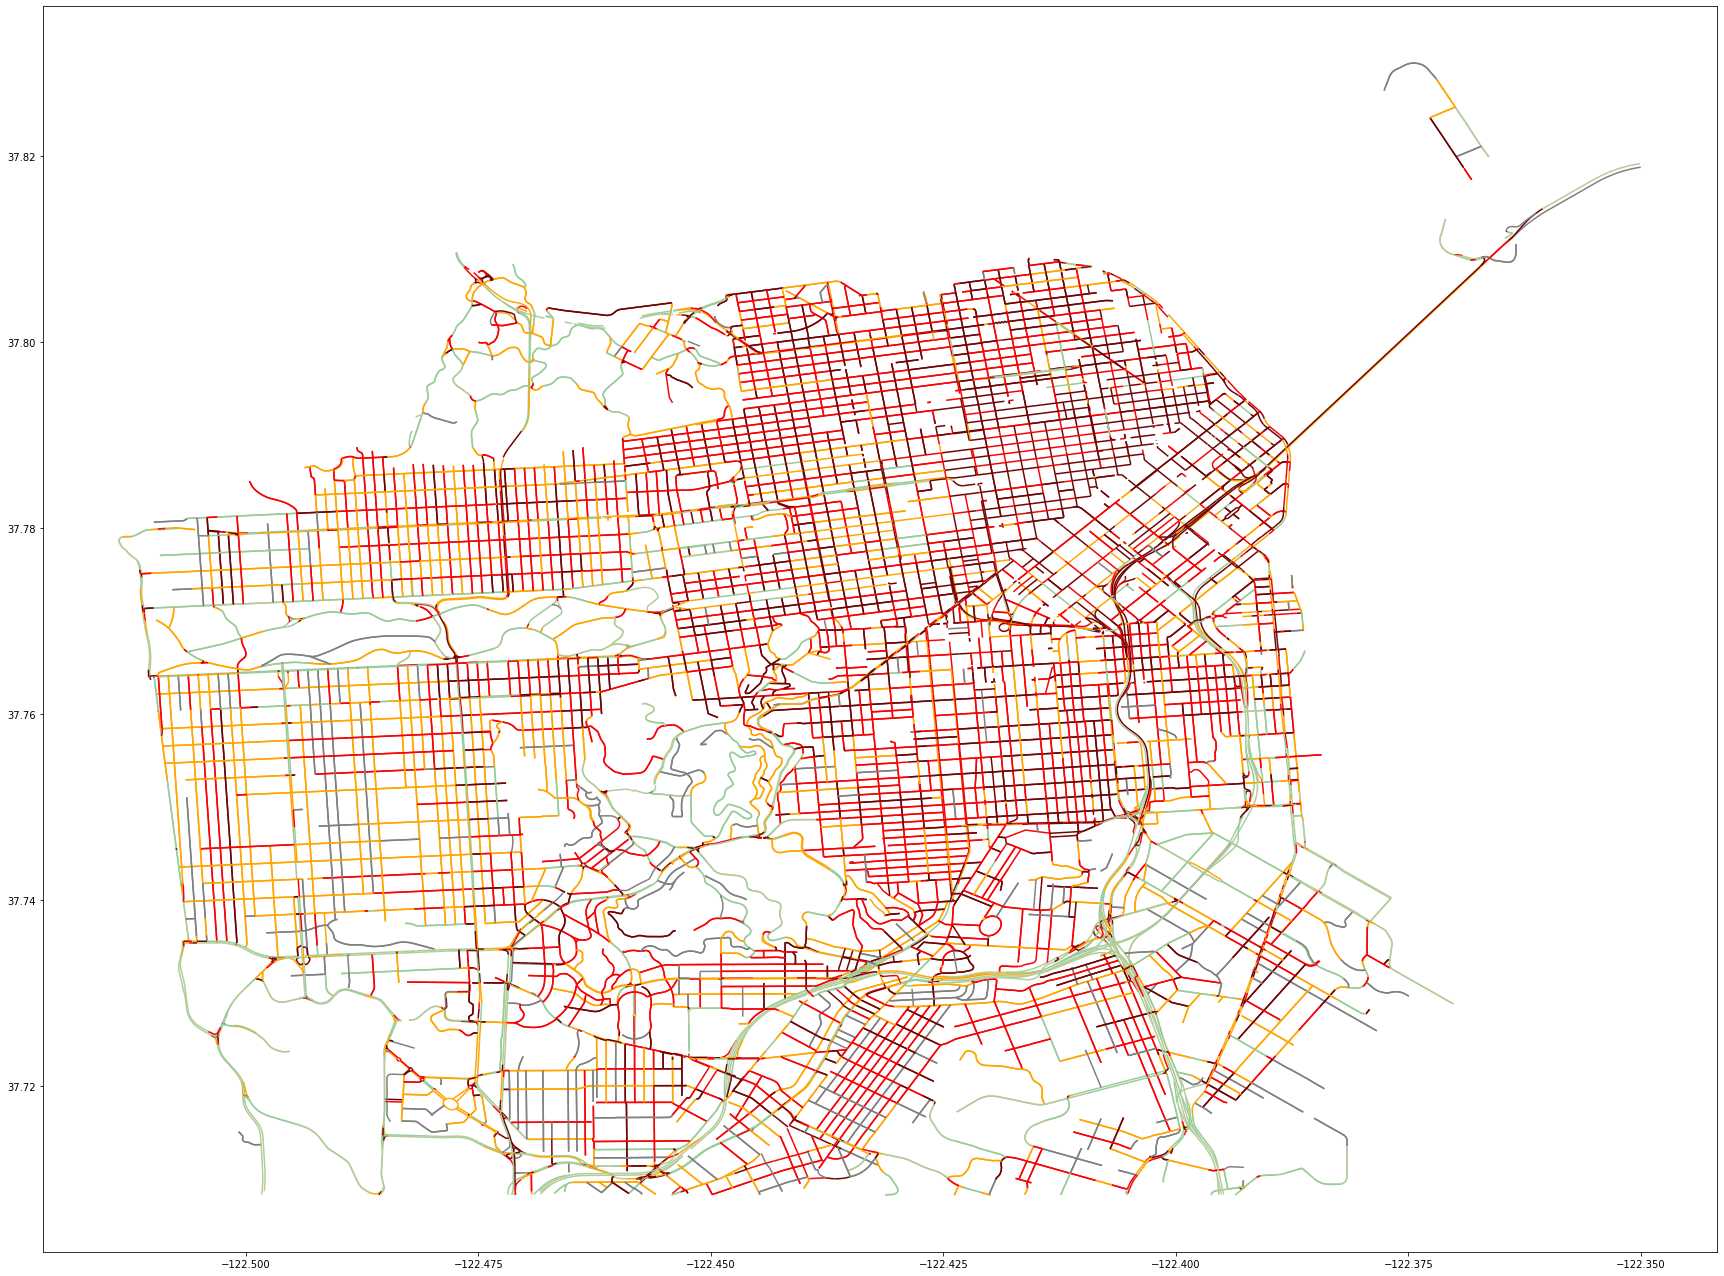

In [76]:
fig, ax = plt.subplots(figsize=(30,30))
weekday.plot(ax=ax, linewidth=1.5, edgecolor=weekday['PM_colour'])
plt.show()

In [77]:
#2.2 Building query list2
day = 'weekend'
time = 'AM'

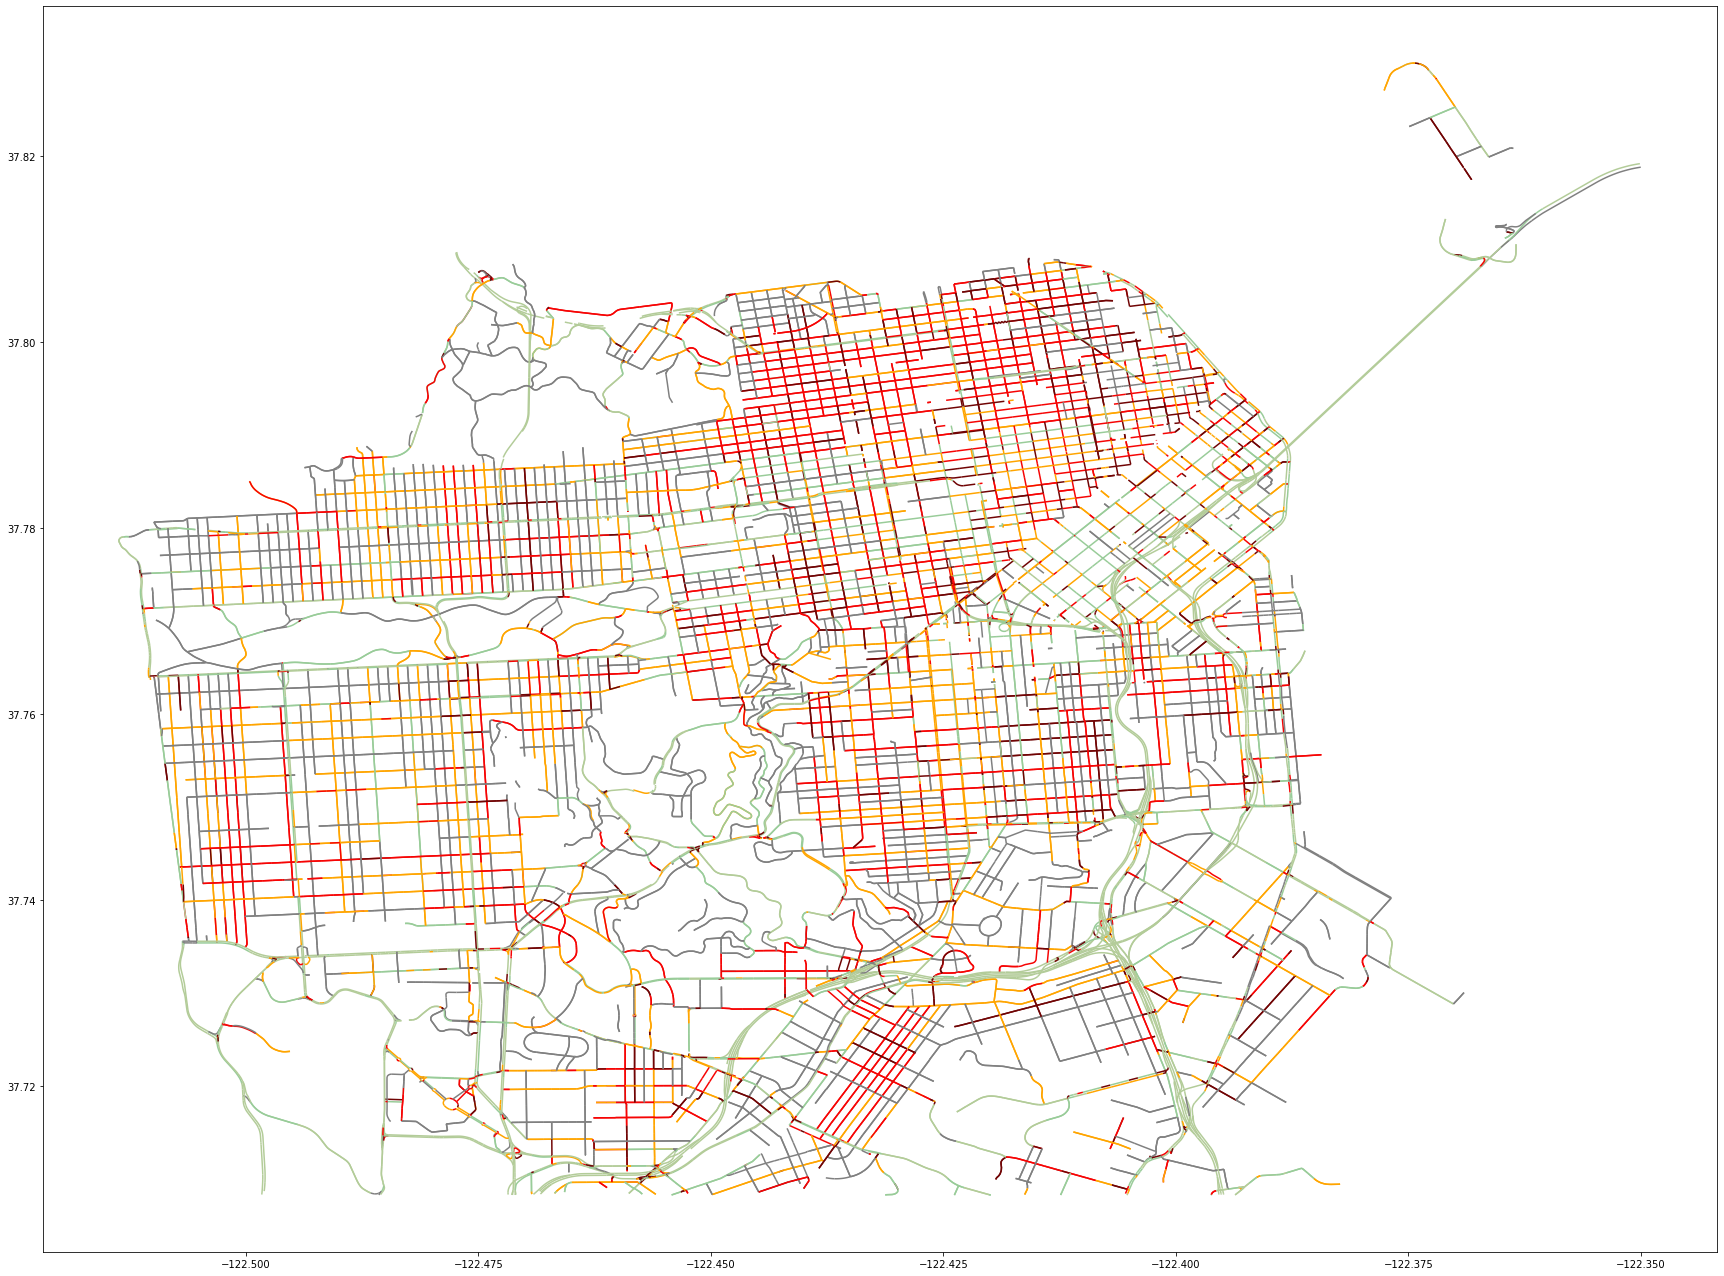

In [78]:
fig, ax = plt.subplots(figsize=(30,30))
weekend.plot(ax=ax, linewidth=1.5, edgecolor=weekend['AM_colour'])
plt.show()

<h3> Transfer the geodataframe to GeoJson for other platform visualization

In [85]:
#Assign caption for each range
## Weekday
weekday.loc[weekday['AM_diff']==0.00, 'AM_label'] = '0-Missing data'
weekday.loc[(weekday['AM_diff']>0)&(weekday['AM_diff']<0.51), 'AM_label'] = '1-Very congested' # Dark red
weekday.loc[(weekday['AM_diff']>=0.51)&(weekday['AM_diff']<0.64), 'AM_label'] = '2-Congested' #red
weekday.loc[(weekday['AM_diff']>=0.64)&(weekday['AM_diff']<0.8), 'AM_label'] = '3-Slow' #orange
weekday.loc[(weekday['AM_diff']>=0.8)&(weekday['AM_diff']<1), 'AM_label'] = '4-Normal' #green
weekday.loc[weekday['AM_diff']>=1, 'AM_label'] = '5-Smooth' #light green

weekday.loc[weekday['MID-DAY_diff']==0.00, 'MID-DAY_label'] = '0-Missing data'
weekday.loc[(weekday['MID-DAY_diff']>0)&(weekday['MID-DAY_diff']<0.51), 'MID-DAY_label'] = '1-Very congested' # Dark red
weekday.loc[(weekday['MID-DAY_diff']>=0.51)&(weekday['MID-DAY_diff']<0.64), 'MID-DAY_label'] = '2-Congested' #red
weekday.loc[(weekday['MID-DAY_diff']>=0.64)&(weekday['MID-DAY_diff']<0.8), 'MID-DAY_label'] = '3-Slow' #orange
weekday.loc[(weekday['MID-DAY_diff']>=0.8)&(weekday['MID-DAY_diff']<1), 'MID-DAY_label'] = '4-Normal' #green
weekday.loc[weekday['MID-DAY_diff']>=1,'MID-DAY_label'] = '5-Smooth' #light green

weekday.loc[weekday['PM_diff']==0.00, 'PM_label'] = '0-Missing data'
weekday.loc[(weekday['PM_diff']>0)&(weekday['PM_diff']<0.51), 'PM_label'] = '1-Very congested' # Dark red
weekday.loc[(weekday['PM_diff']>=0.51)&(weekday['PM_diff']<0.64), 'PM_label'] = '2-Congested' #red
weekday.loc[(weekday['PM_diff']>=0.64)&(weekday['PM_diff']<0.8), 'PM_label'] = '3-Slow' #orange
weekday.loc[(weekday['PM_diff']>=0.8)&(weekday['PM_diff']<1), 'PM_label'] = '4-Normal' #green
weekday.loc[weekday['PM_diff']>=1, 'PM_label'] = '5-Smooth' #light green

weekday.loc[weekday['NIGHT_diff']==0.00, 'NIGHT_label'] = '0-Missing data'
weekday.loc[(weekday['NIGHT_diff']>0)&(weekday['NIGHT_diff']<0.51), 'NIGHT_label'] = '1-Very congested' # Dark red
weekday.loc[(weekday['NIGHT_diff']>=0.51)&(weekday['NIGHT_diff']<0.64), 'NIGHT_label'] ='2-Congested' #red
weekday.loc[(weekday['NIGHT_diff']>=0.64)&(weekday['NIGHT_diff']<0.8), 'NIGHT_label'] = '3-Slow' #orange
weekday.loc[(weekday['NIGHT_diff']>=0.8)&(weekday['NIGHT_diff']<1), 'NIGHT_label'] = '4-Normal' #green
weekday.loc[weekday['NIGHT_diff']>=1, 'NIGHT_label'] = '5-Smooth' #light green

## Weekend
weekend.loc[weekend['AM_diff']==0.00, 'AM_label'] = '0-Missing data'
weekend.loc[(weekend['AM_diff']>0)&(weekend['AM_diff']<0.51), 'AM_label'] = '1-Very congested' # Dark red
weekend.loc[(weekend['AM_diff']>=0.51)&(weekend['AM_diff']<0.64), 'AM_label'] = '2-Congested' #red
weekend.loc[(weekend['AM_diff']>=0.64)&(weekend['AM_diff']<0.8), 'AM_label'] = '3-Slow' #orange
weekend.loc[(weekend['AM_diff']>=0.8)&(weekend['AM_diff']<1), 'AM_label'] = '4-Normal' #green
weekend.loc[weekend['AM_diff']>=1, 'AM_label'] = '5-Smooth' #light green

weekend.loc[weekend['MID-DAY_diff']==0.00, 'MID-DAY_label'] = '0-Missing data'
weekend.loc[(weekend['MID-DAY_diff']>0)&(weekend['MID-DAY_diff']<0.51), 'MID-DAY_label'] = '1-Very congested' # Dark red
weekend.loc[(weekend['MID-DAY_diff']>=0.51)&(weekend['MID-DAY_diff']<0.64), 'MID-DAY_label'] = '2-Congested' #red
weekend.loc[(weekend['MID-DAY_diff']>=0.64)&(weekend['MID-DAY_diff']<0.8), 'MID-DAY_label'] = '3-Slow' #orange
weekend.loc[(weekend['MID-DAY_diff']>=0.8)&(weekend['MID-DAY_diff']<1), 'MID-DAY_label'] = '4-Normal' #green
weekend.loc[weekend['MID-DAY_diff']>=1, 'MID-DAY_label'] ='5-Smooth' #light green

weekend.loc[weekend['PM_diff']==0.00, 'PM_label'] = '0-Missing data'
weekend.loc[(weekend['PM_diff']>0)&(weekend['PM_diff']<0.51), 'PM_label'] = '1-Very congested' # Dark red
weekend.loc[(weekend['PM_diff']>=0.51)&(weekend['PM_diff']<0.64), 'PM_label'] = '2-Congested' #red
weekend.loc[(weekend['PM_diff']>=0.64)&(weekend['PM_diff']<0.8), 'PM_label'] = '3-Slow' #orange
weekend.loc[(weekend['PM_diff']>=0.8)&(weekend['PM_diff']<1), 'PM_label'] = '4-Normal' #green
weekend.loc[weekend['PM_diff']>=1, 'PM_label'] = '5-Smooth' #light green

weekend.loc[weekend['NIGHT_diff']==0.00, 'NIGHT_label'] = '0-Missing data'
weekend.loc[(weekend['NIGHT_diff']>0)&(weekend['NIGHT_diff']<0.51), 'NIGHT_label'] = '1-Very congested' # Dark red
weekend.loc[(weekend['NIGHT_diff']>=0.51)&(weekend['NIGHT_diff']<0.64), 'NIGHT_label'] = '2-Congested' #red
weekend.loc[(weekend['NIGHT_diff']>=0.64)&(weekend['NIGHT_diff']<0.8), 'NIGHT_label'] = '3-Slow' #orange
weekend.loc[(weekend['NIGHT_diff']>=0.8)&(weekend['NIGHT_diff']<1), 'NIGHT_label'] = '4-Normal' #green
weekend.loc[weekend['NIGHT_diff']>=1, 'NIGHT_label'] = '5-Smooth' #light green

In [86]:
weekday

u           v  key      osmid  oneway      highway  \
0       287834139    65312832    0  133743842    True    secondary   
1       287834139  6902779320    0  503825191    True    secondary   
2        65337375    65359314    0   25372358   False     tertiary   
3        65359314    65337375    0   25372358   False     tertiary   
4        65337375  3836814558    0  425516652   False     tertiary   
...           ...         ...  ...        ...     ...          ...   
23028  6382089301  1985091614    0  187871688    True  residential   
23029  5590744546    65287360    0  584944917    True    secondary   
23030  3526885173  3885158728    0  385163271    True  residential   
23031  3526885173    65346168    0  516185201    True    secondary   
23032  4784127976    65339315    0  254448242    True    secondary   

                         name maxspeed   length  \
0             Dewey Boulevard   25 mph   11.204   
1      Laguna Honda Boulevard      NaN   12.120   
2              Sansome Street      NaN  102.552   
3              Sansome Street      NaN  102.552   
4              Sansome Street      NaN   49.126   
...                       ...      ...      ...   
23028        El Dorado Street      NaN   42.895   
23029         Crossover Drive      NaN   63.335   
23030             State Drive      NaN   12.630   
23031   Lake Merced Boulevard   40 mph  202.179   
23032       Divisadero Street      NaN   95.458   

                                                geometry  ...   PM_diff  \
0      LINESTRING (-122.45927 37.74722, -122.45914 37...  ...  0.698415   
1      LINESTRING (-122.45927 37.74722, -122.45918 37...  ...  0.668148   
2      LINESTRING (-122.40187 37.79663, -122.40186 37...  ...  0.503374   
3      LINESTRING (-122.40169 37.79572, -122.40171 37...  ...  0.503374   
4      LINESTRING (-122.40187 37.79663, -122.40188 37...  ...  0.694409   
...                                                  ...  ...       ...   
23028  LINESTRING (-122.39365 37.77229, -122.39341 37...  ...  0.516096   
23029  LINESTRING (-122.48389 37.77208, -122.48393 37...  ...  0.305290   
23030  LINESTRING (-122.48462 37.72496, -122.48476 37...  ...  0.869308   
23031  LINESTRING (-122.48462 37.72496, -122.48398 37...  ...  0.886247   
23032  LINESTRING (-122.43873 37.77976, -122.43886 37...  ...  0.340886   

      NIGHT_diff AM_colour MID-DAY_colour PM_colour NIGHT_colour  \
0       0.662965   #ffa500        #ffa500   #ffa500      #ffa500   
1       0.649684   #ffa500        #ffa500   #ffa500      #ffa500   
2       0.721780   #700404        #700404   #700404      #ffa500   
3       0.721780   #700404        #700404   #700404      #ffa500   
4       0.825868   #f60404        #f60404   #ffa500      #99cc99   
...          ...       ...            ...       ...          ...   
23028   0.000000   #700404        #700404   #f60404         grey   
23029   0.286533   #700404        #700404   #700404      #700404   
23030   0.729481      grey        #ffa500   #99cc99      #ffa500   
23031   1.142221   #b3cc99        #b3cc99   #99cc99      #b3cc99   
23032   0.401687   #ffa500        #700404   #700404      #700404   

               AM_label     MID-DAY_label          PM_label       NIGHT_label  
0                3-Slow            3-Slow            3-Slow            3-Slow  
1                3-Slow            3-Slow            3-Slow            3-Slow  
2      1-Very congested  1-Very congested  1-Very congested            3-Slow  
3      1-Very congested  1-Very congested  1-Very congested            3-Slow  
4           2-Congested       2-Congested            3-Slow          4-Normal  
...                 ...               ...               ...               ...  
23028  1-Very congested  1-Very congested       2-Congested    0-Missing data  
23029  1-Very congested  1-Very congested  1-Very congested  1-Very congested  
23030    0-Missing data            3-Slow          4-Normal            3-Slow  
23031          5-Smooth          5-Smooth   

In [87]:
weekday.to_file("weekday.geojson", driver='GeoJSON')
weekend.to_file("weekend.geojson", driver='GeoJSON')